In [1]:
from typing import Optional, Callable, Tuple, List, NoReturn
from functools import partial

import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np
import cv2 as cv
import PIL as pil

import importlib

In [5]:
# User-defined functions, utils module found in the same directory as Erosion.ipynb
from utils import binarise, side_by_side, rescale_img, reverse, structuring_circle, opening, closing

ImportError: cannot import name 'opening' from 'utils' (/Users/gml/Documents/IX/imagenes/MorphoImg/utils.py)

In [3]:
# Importamos todas nuestras funciones:
import mfilt_funcs as mine
importlib.reload(mine)
from mfilt_funcs import *

In [5]:
x = img.imread('imagenes/Im1T4.png')

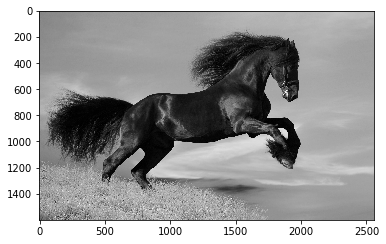

In [6]:
plt.imshow(x, cmap='gray')

In [7]:
x = reverse(x)

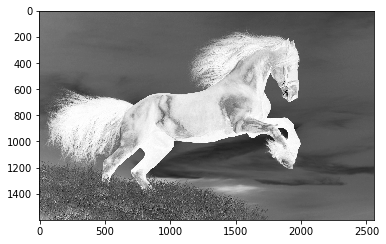

In [8]:
plt.imshow(x, cmap='gray')

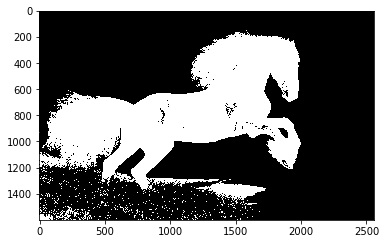

In [9]:
binaria = binarise(x)
plt.imshow(binaria, cmap='gray')

In [10]:
help(opening)

Help on function opening in module __main__:

opening(src: numpy.ndarray, kernel: numpy.ndarray, iterations: int = 1) -> numpy.ndarray
    As defined in pages 644 and 645 :
        'The opening A by B is the erosion of A by B, followed by a dilation of the result by B'
    
    This function is should be equivalent to :
        cv.morphologyEx(img, cv.MORPH_OPEN, kernel)



# Opening

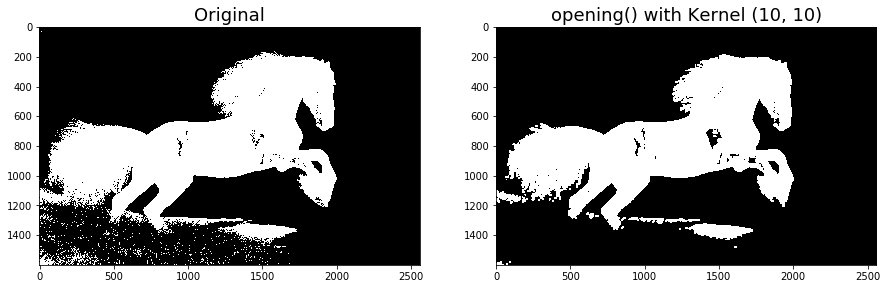

In [11]:
kernel = np.ones((10, 10))
side_by_side(binaria, opening(binaria, kernel), title1='Original', title2=f'opening() with Kernel {kernel.shape}')

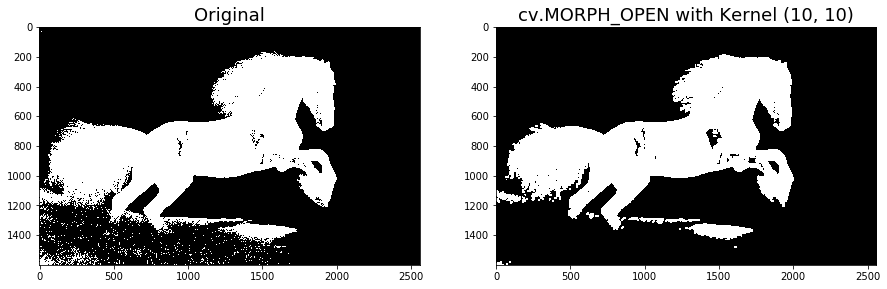

In [12]:
kernel = np.ones((10, 10))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_OPEN, kernel), title1='Original', title2=f'cv.MORPH_OPEN with Kernel {kernel.shape}')

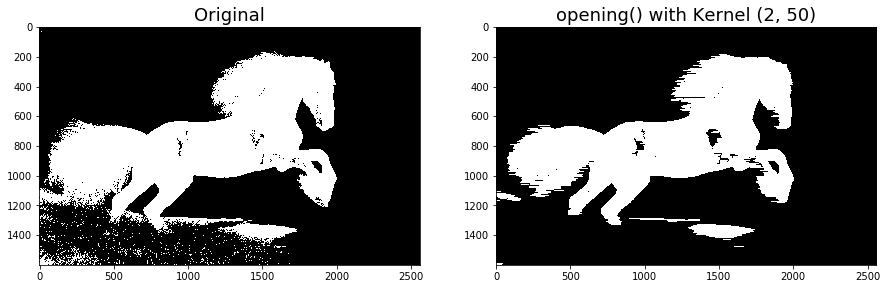

In [13]:
kernel = np.ones((2, 50))
side_by_side(binaria, opening(binaria, kernel), title1='Original', title2=f'opening() with Kernel {kernel.shape}')

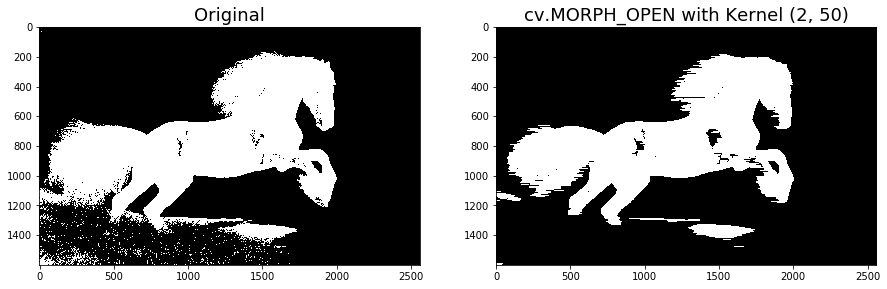

In [14]:
kernel = np.ones((2, 50))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_OPEN, kernel), title1='Original', title2=f'cv.MORPH_OPEN with Kernel {kernel.shape}')

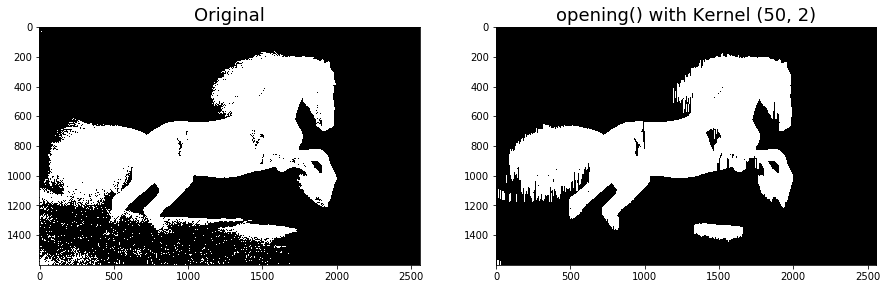

In [15]:
kernel = np.ones((50, 2))
side_by_side(binaria, opening(binaria, kernel), title1='Original', title2=f'opening() with Kernel {kernel.shape}')

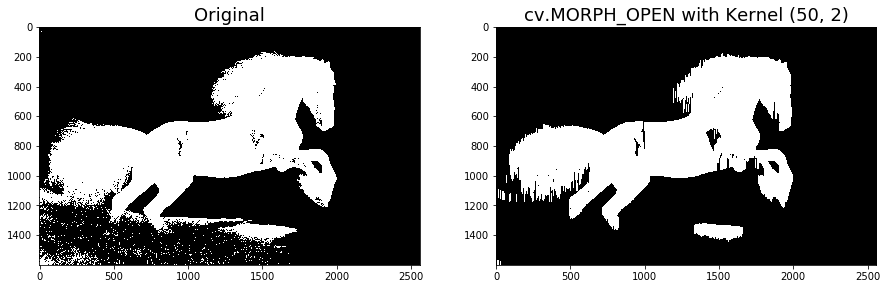

In [16]:
kernel = np.ones((50, 2))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_OPEN, kernel), title1='Original', title2=f'cv.MORPH_OPEN with Kernel {kernel.shape}')

As Gonzalez explained in the book, an opening is nothing but an erosion followed by a dilation.
Our custom function ```opening(image, kernel)``` yields the same result as executing ```cv.morphologyEx(image, cv.MORPH_OPEN, kernel)```

# Closing

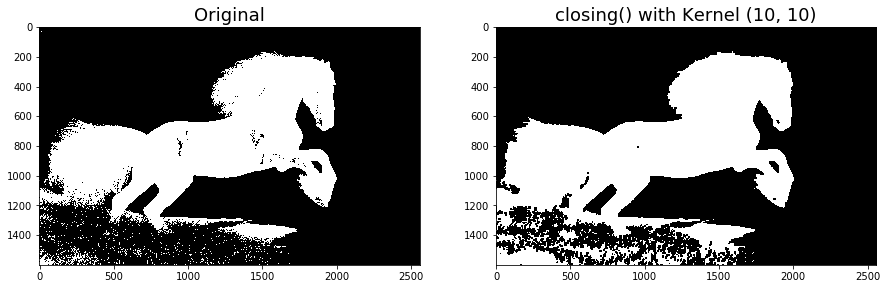

In [17]:
kernel = np.ones((10, 10))
side_by_side(binaria, closing(binaria, kernel), title1='Original', title2=f'closing() with Kernel {kernel.shape}')

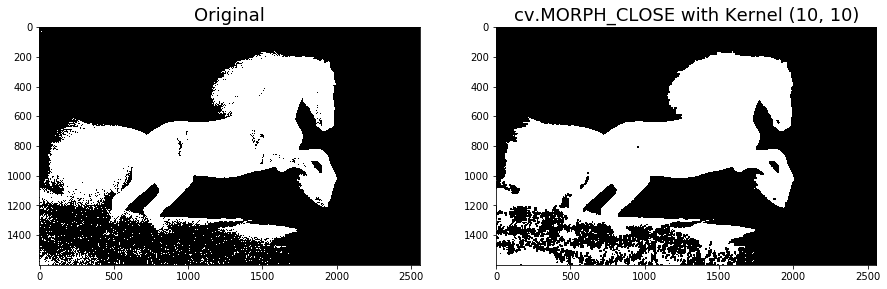

In [18]:
kernel = np.ones((10, 10))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_CLOSE, kernel), title1='Original', title2=f'cv.MORPH_CLOSE with Kernel {kernel.shape}')

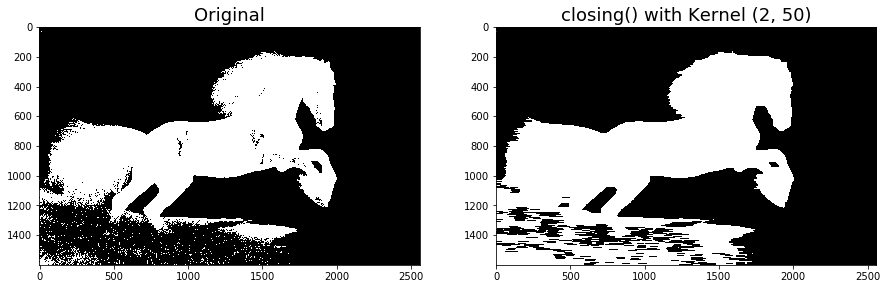

In [19]:
kernel = np.ones((2, 50))
side_by_side(binaria, closing(binaria, kernel), title1='Original', title2=f'closing() with Kernel {kernel.shape}')

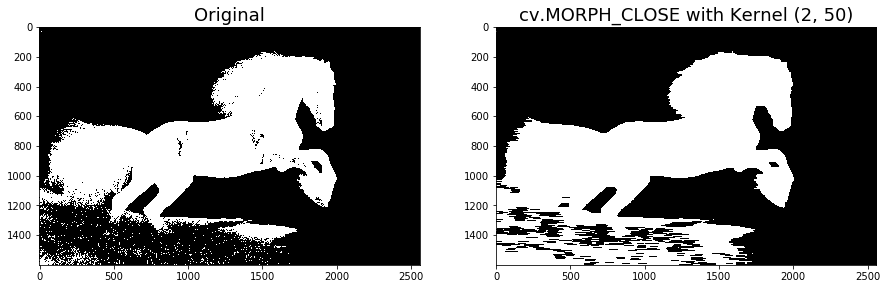

In [20]:
kernel = np.ones((2, 50))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_CLOSE, kernel), title1='Original', title2=f'cv.MORPH_CLOSE with Kernel {kernel.shape}')

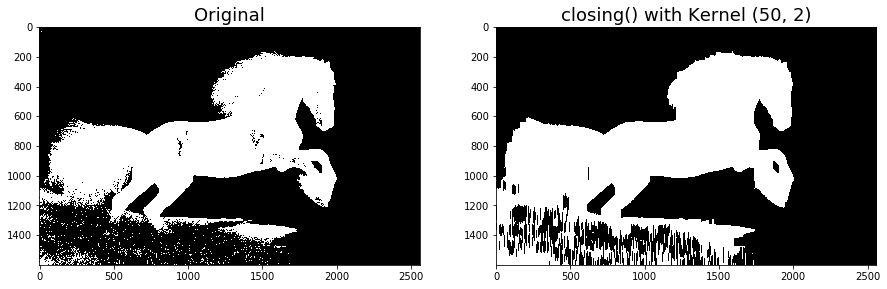

In [21]:
kernel = np.ones((50, 2))
side_by_side(binaria, closing(binaria, kernel), title1='Original', title2=f'closing() with Kernel {kernel.shape}')

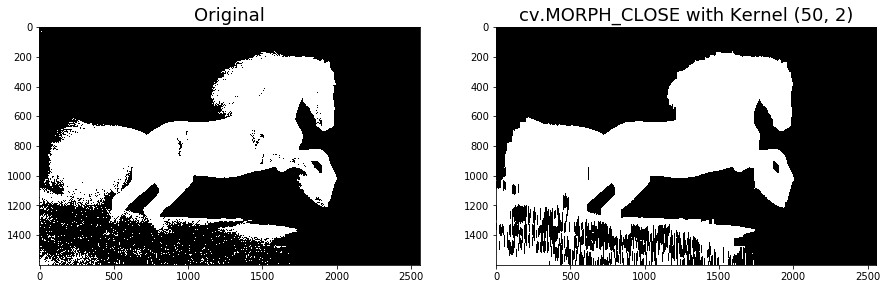

In [22]:
kernel = np.ones((50, 2))
side_by_side(binaria, cv.morphologyEx(binaria, cv.MORPH_CLOSE, kernel), title1='Original', title2=f'cv.MORPH_CLOSE with Kernel {kernel.shape}')

As Gonzalez explained in the book, the closing operation is nothing but a dilation followed by an erosion.
Our custom function ```closing(image, kernel)``` yields the same result as executing ```cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)```

# Example found on page 643

In [23]:
figura = cv.imread('imagenes/figura.png', 0) / 255.0
figura = reverse(figura)
figura.shape, figura.dtype

((118, 235), dtype('float64'))

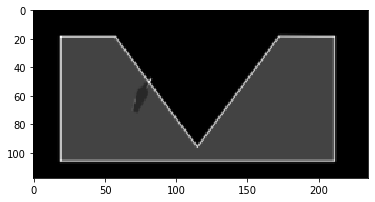

In [24]:
plt.imshow(figura, cmap='gray')

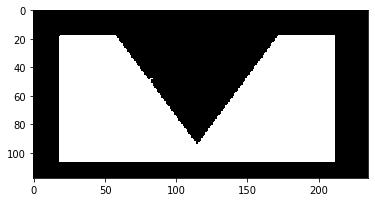

In [25]:
figura2 = binarise(figura)
plt.imshow(figura2, cmap='gray')

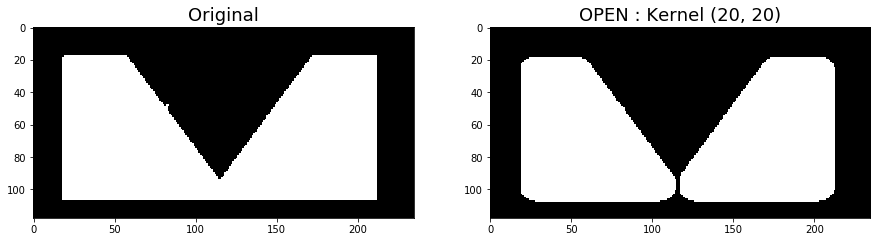

In [26]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20, 20))
side_by_side(figura2, cv.morphologyEx(figura2, cv.MORPH_OPEN ,kernel), title1='Original', title2=f'OPEN : Kernel {kernel.shape}')

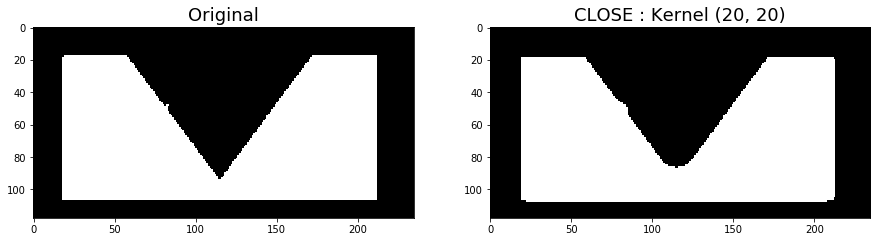

In [27]:
side_by_side(figura2, cv.morphologyEx(figura2, cv.MORPH_CLOSE ,kernel), title1='Original', title2=f'CLOSE : Kernel {kernel.shape}')

Text(0.5, 1.0, 'Opening, acording to Gonzalez')

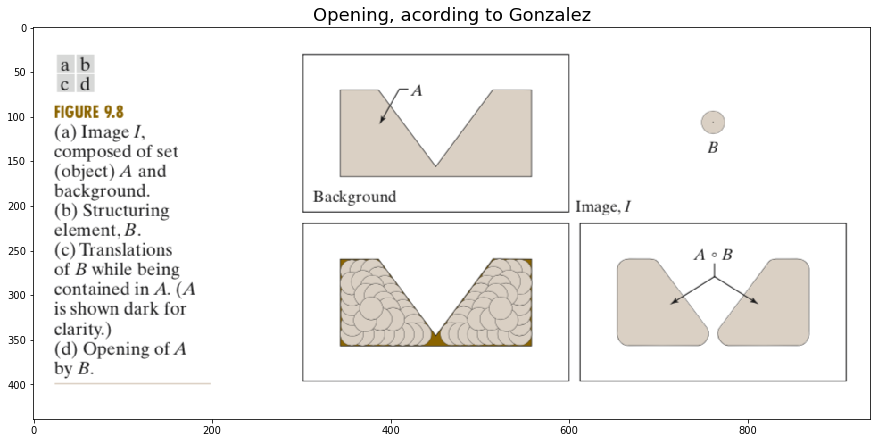

In [28]:
plt.figure(figsize=(15,10))
plt.imshow(cv.imread('imagenes/opening.png'))
plt.title('Opening, acording to Gonzalez', size = 18)

Text(0.5, 1.0, 'Closing, acording to Gonzalez')

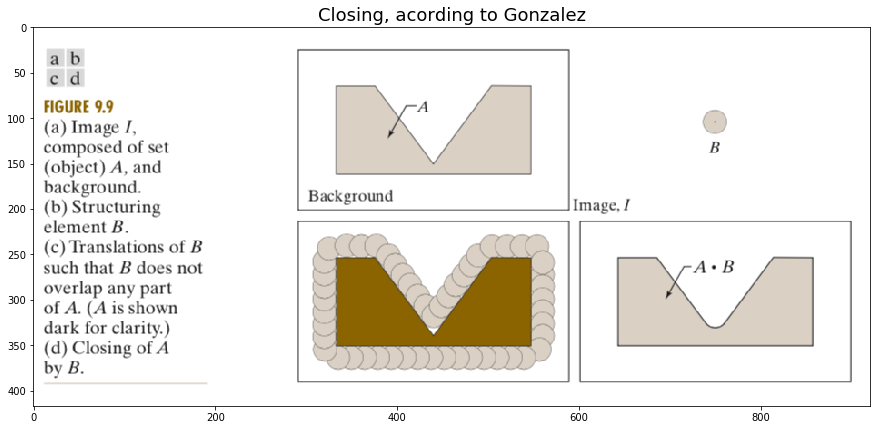

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(cv.imread('imagenes/closing.png'))
plt.title('Closing, acording to Gonzalez', size = 18)

# Idempotence property

1. $$ (A \circ B) \circ B = A \circ B $$

Through induction, one arrives to the conclusion that this operation can be repeated indefinitely and the result will always be the same as one opening.

In [30]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

/Users/gml/Documents/IX/imagenes/MorphoImg/utils.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = _figsize)


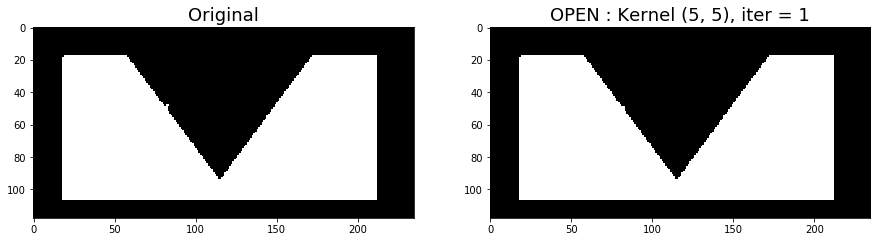

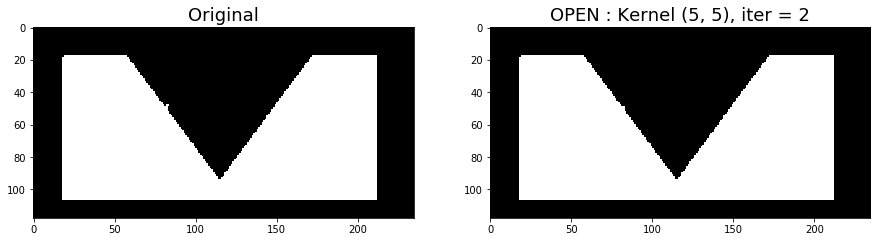

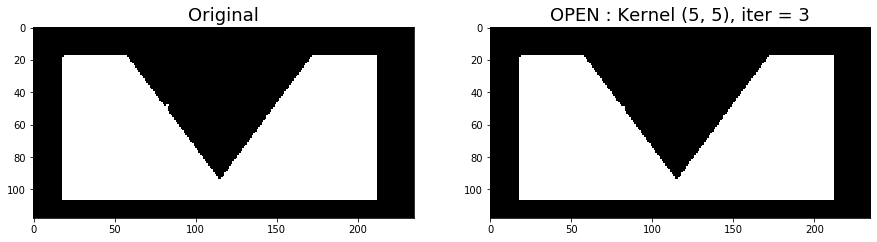

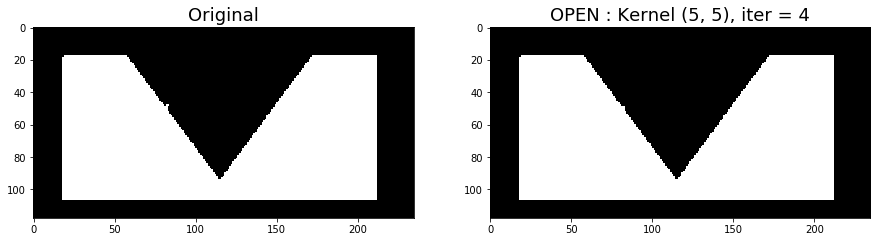

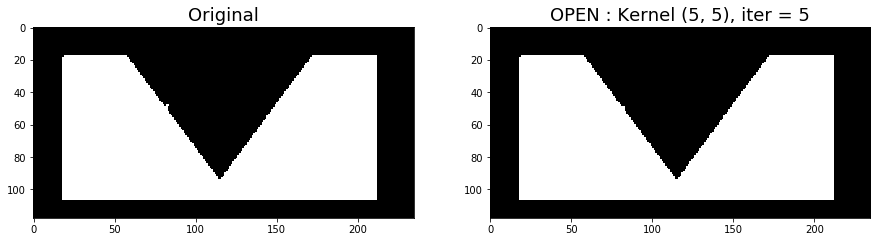

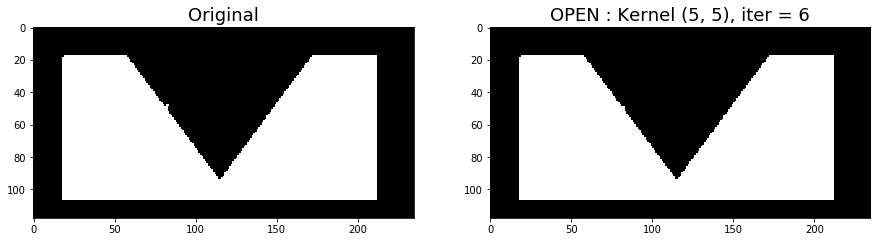

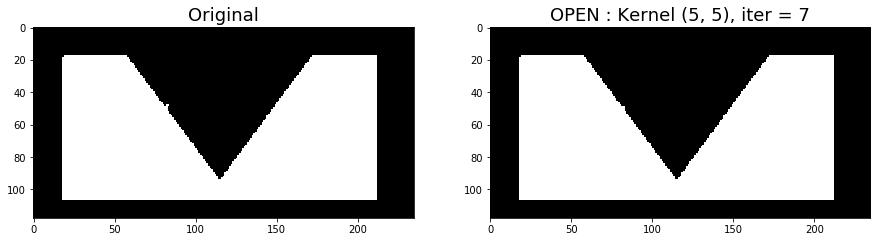

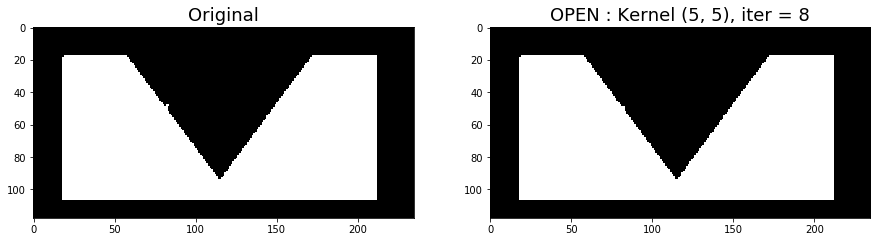

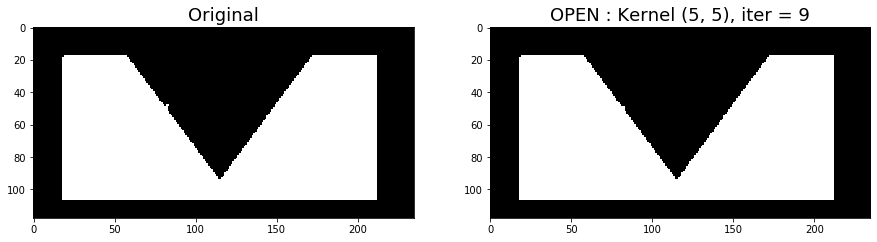

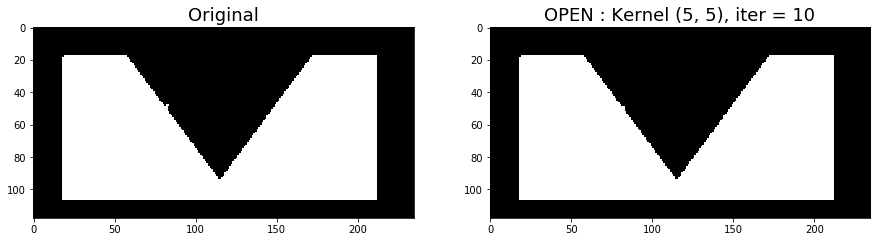

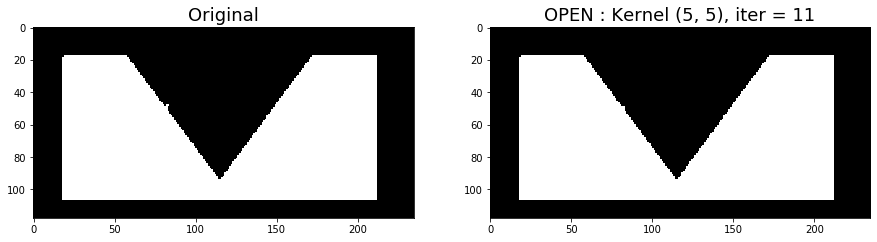

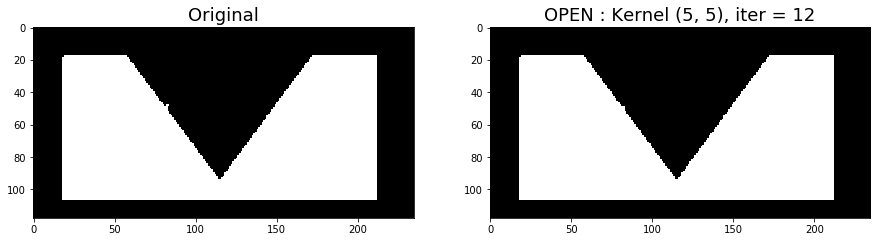

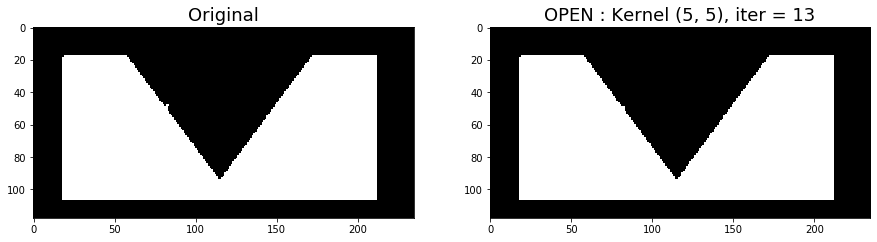

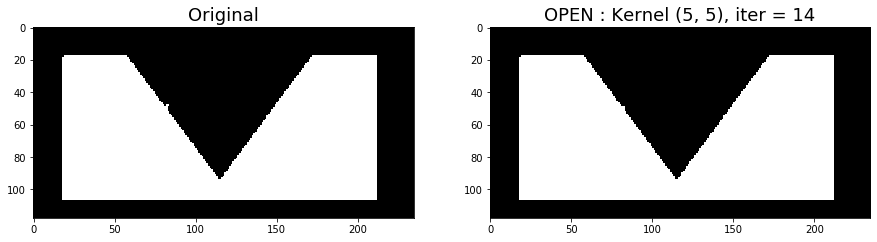

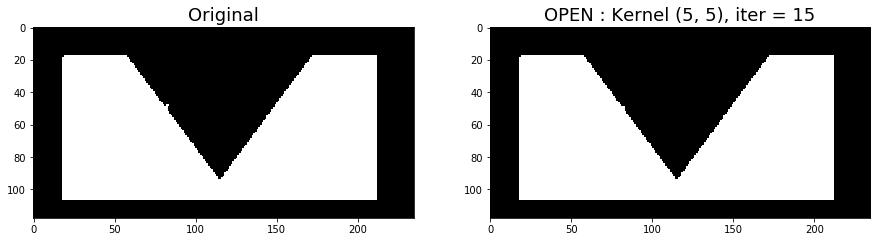

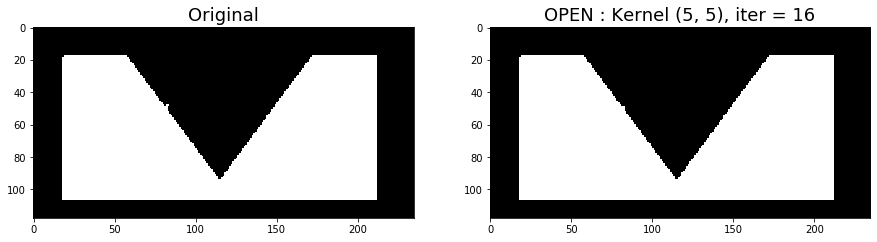

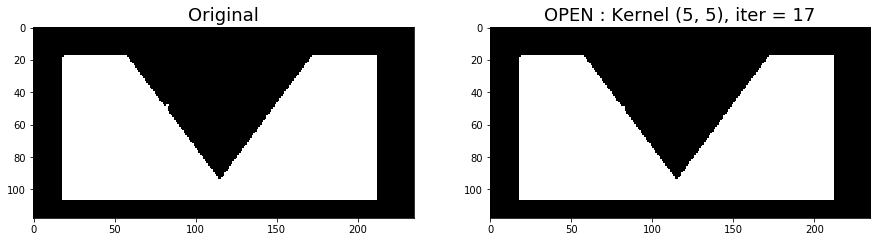

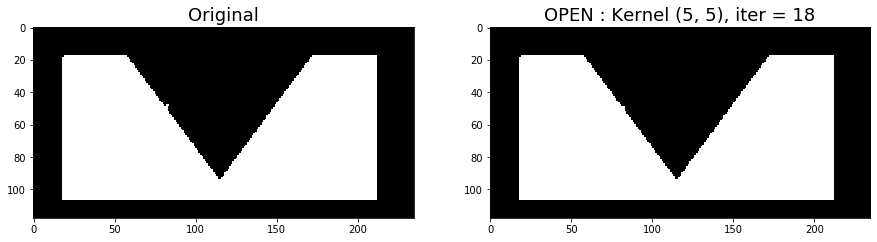

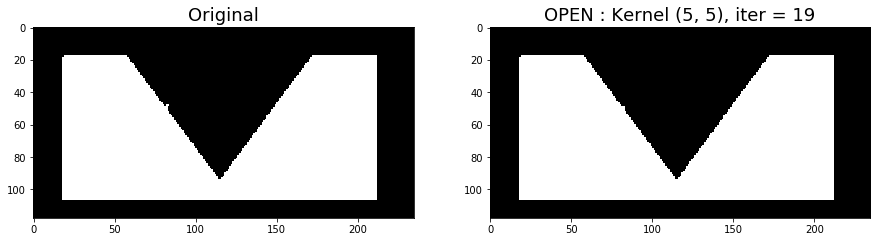

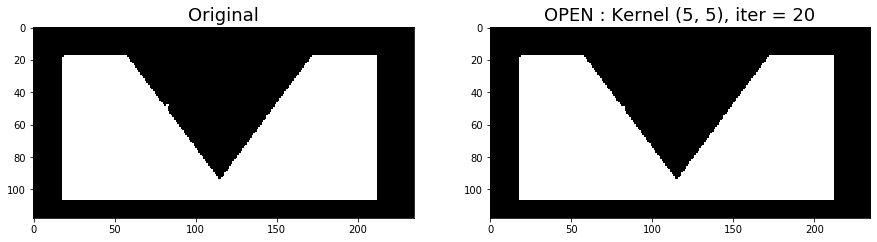

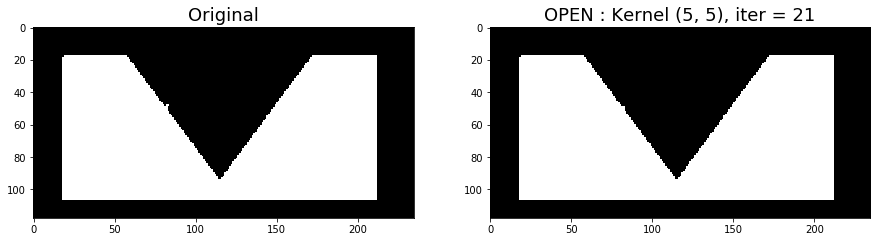

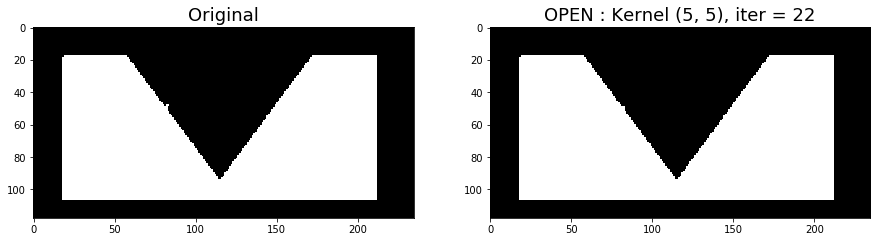

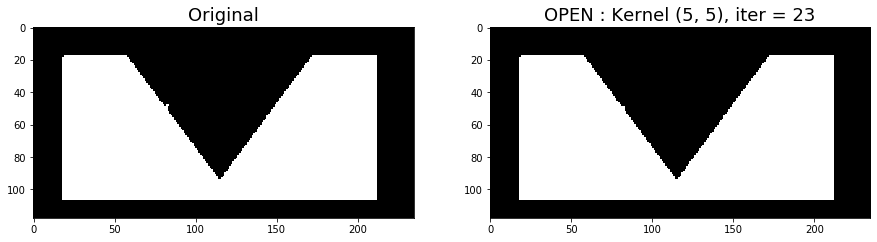

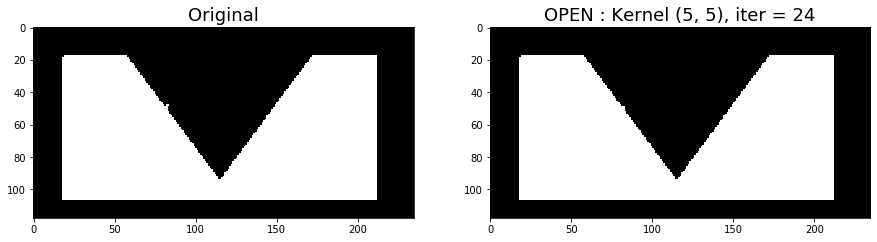

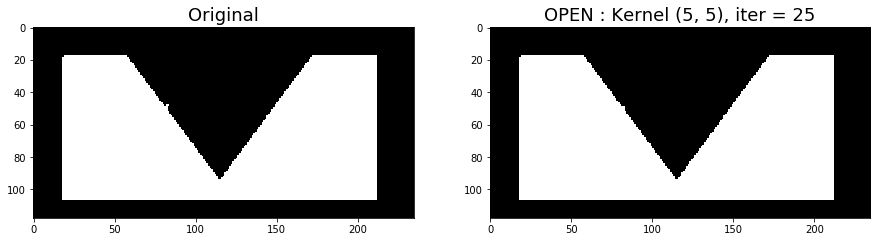

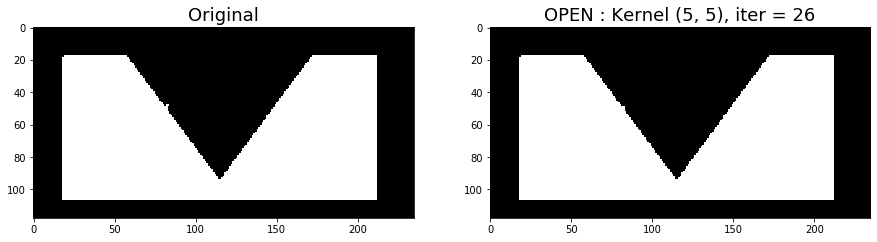

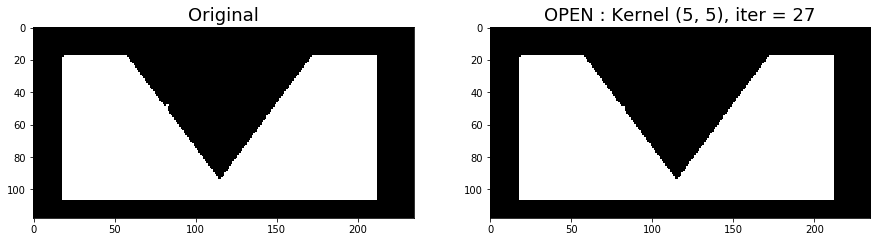

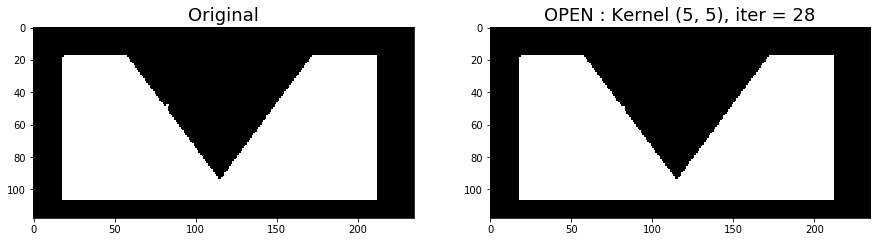

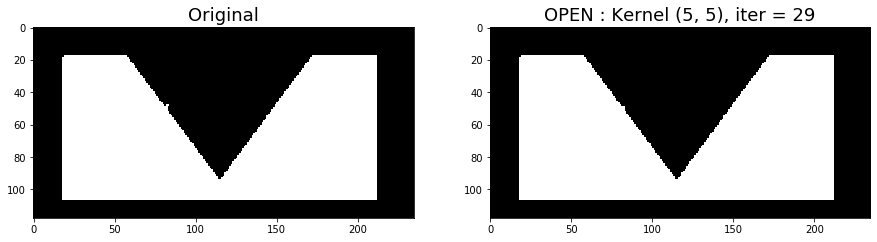

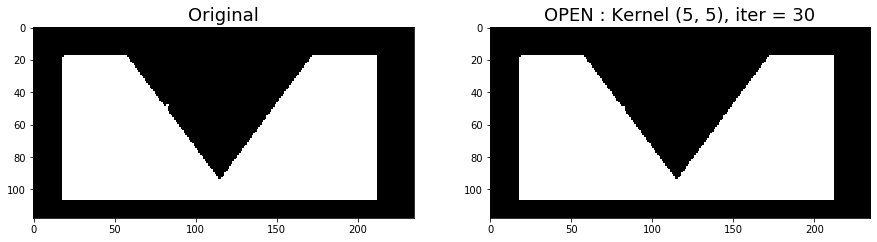

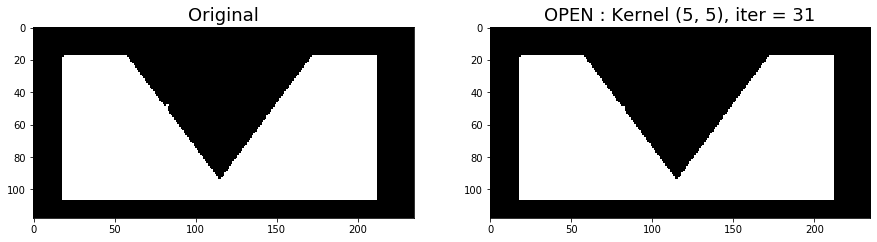

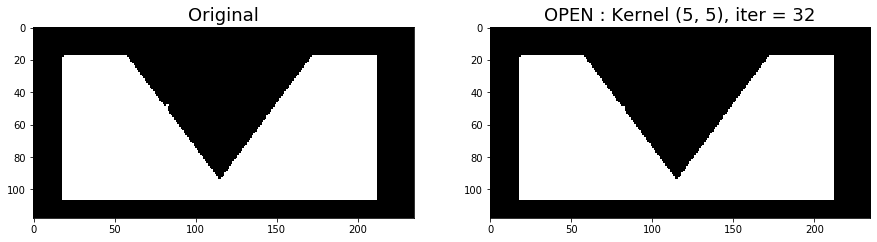

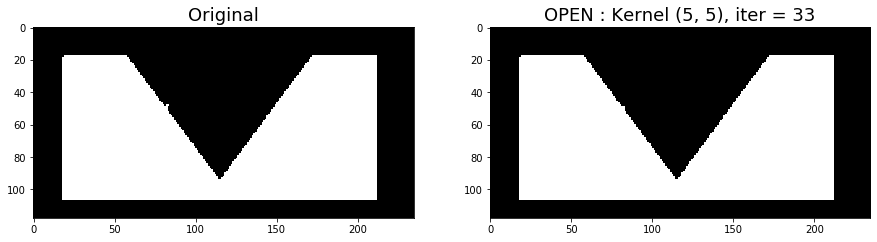

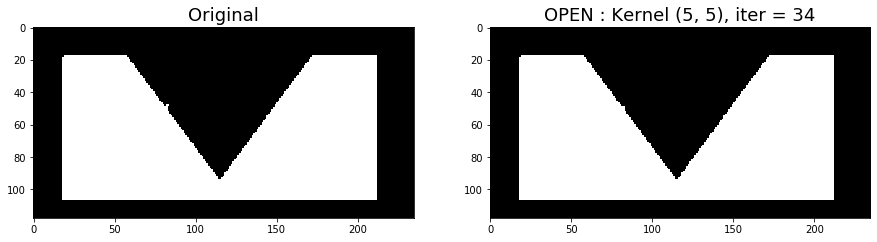

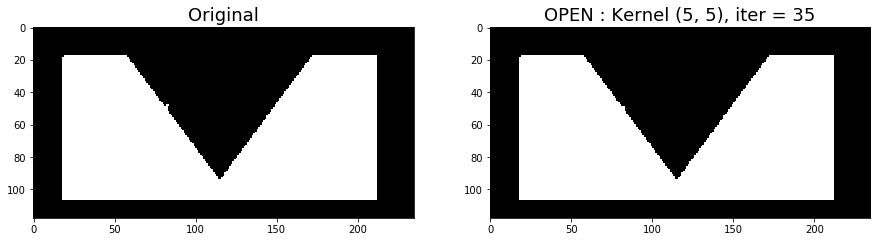

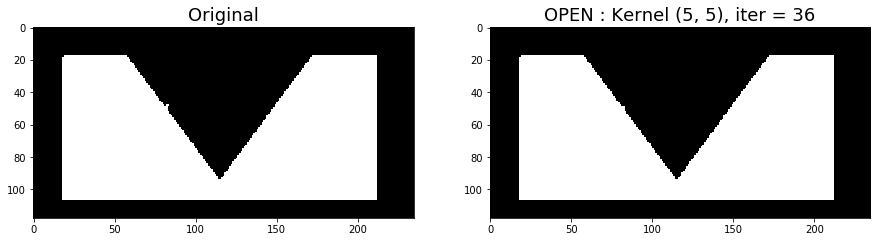

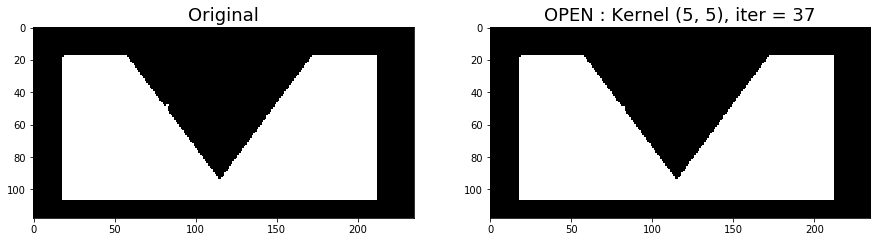

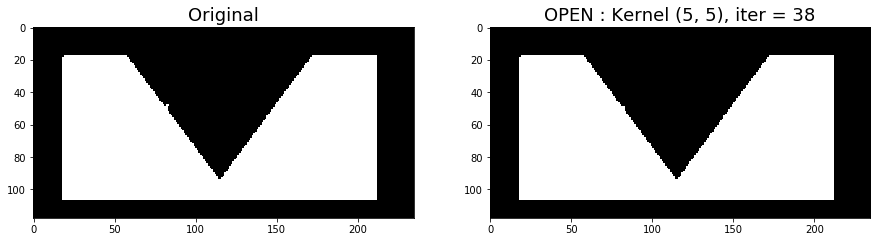

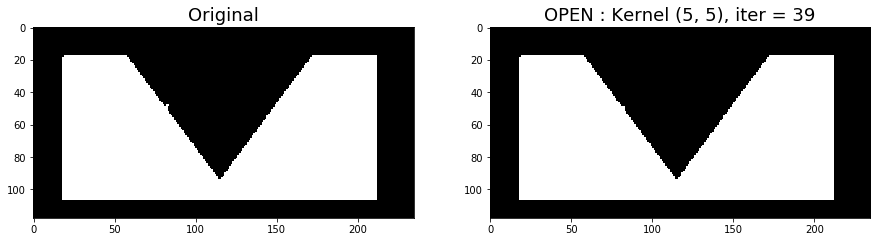

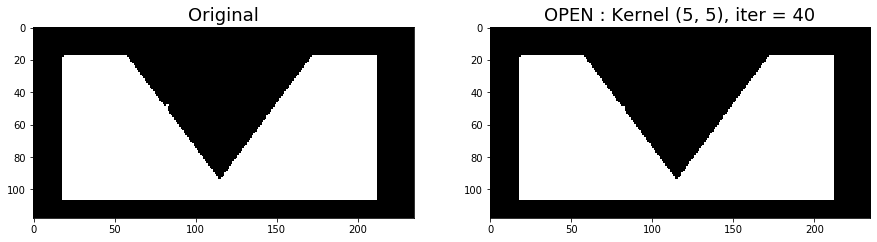

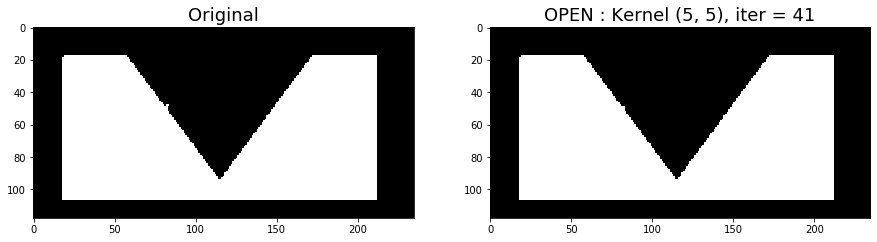

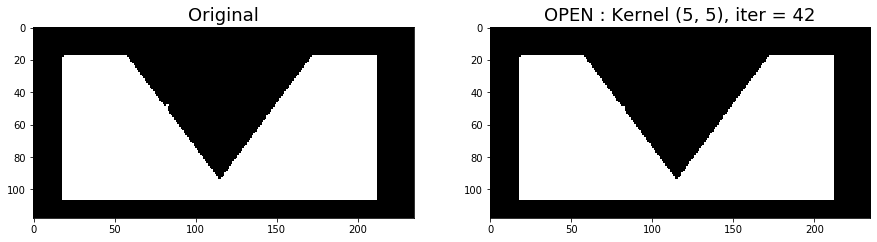

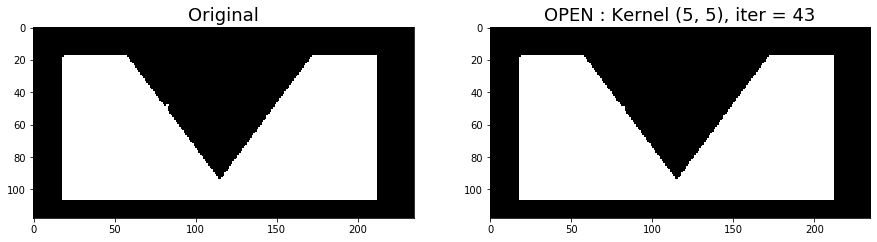

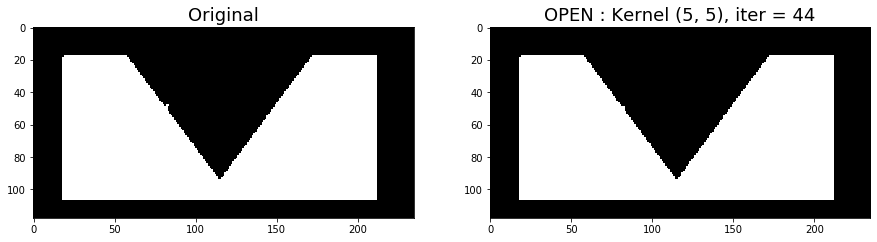

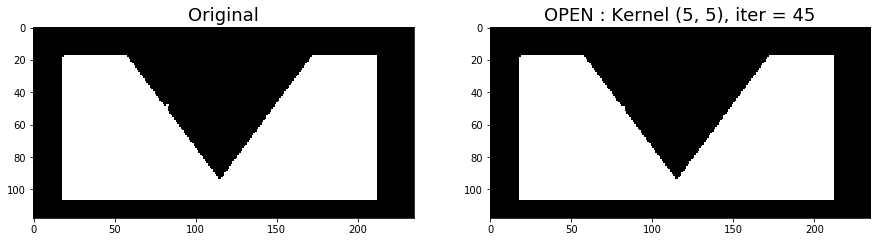

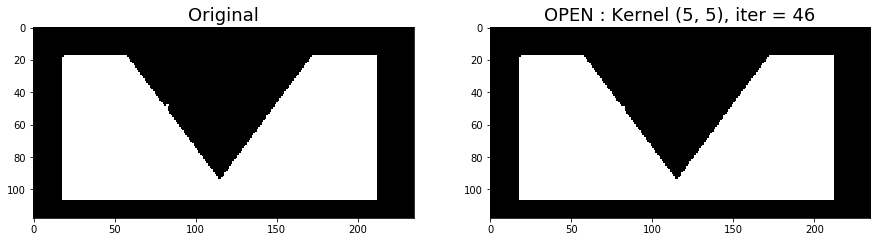

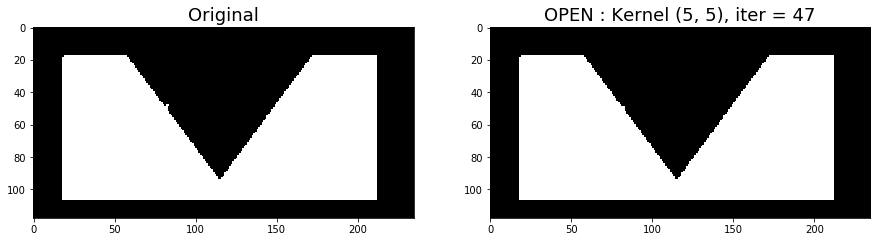

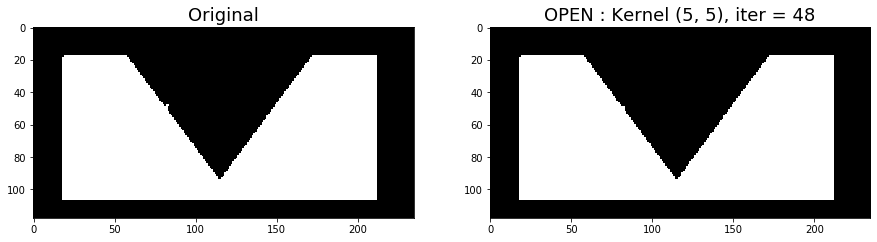

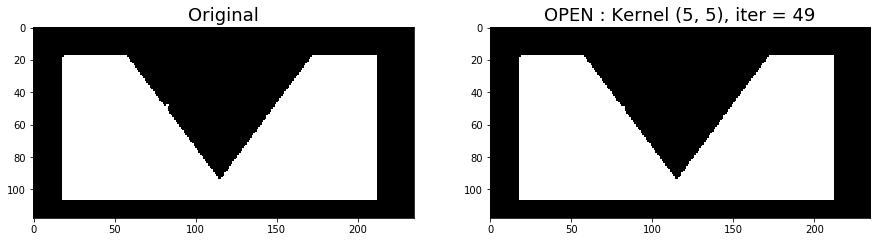

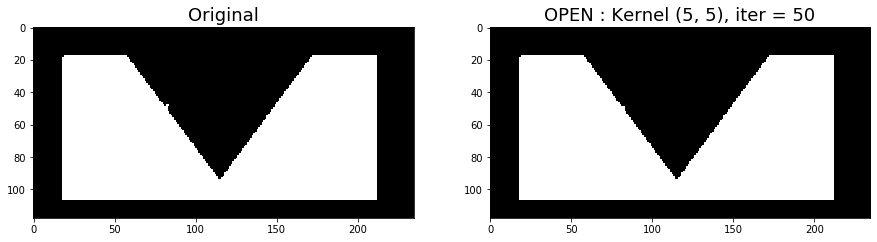

In [31]:
idemPot = figura2.copy()
for i in range(50):
    idemPot = cv.morphologyEx(idemPot, cv.MORPH_OPEN, kernel)
    side_by_side(figura2, idemPot, title1='Original', title2=f'OPEN : Kernel {kernel.shape}, iter = {i+1}')

In [118]:
plt.close('all')

In [108]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (15, 15))
kernel

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

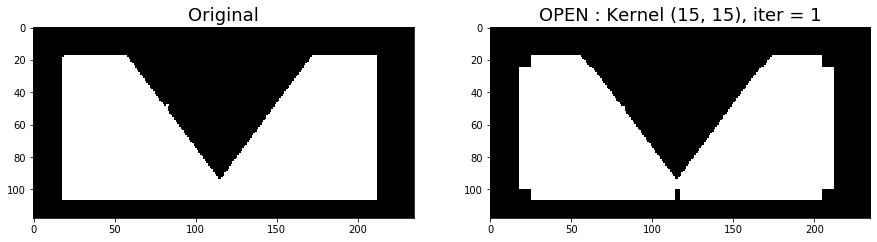

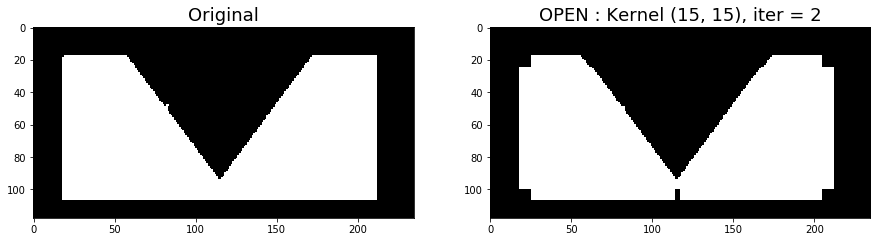

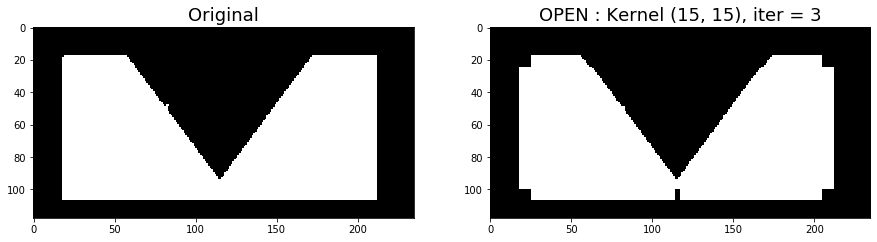

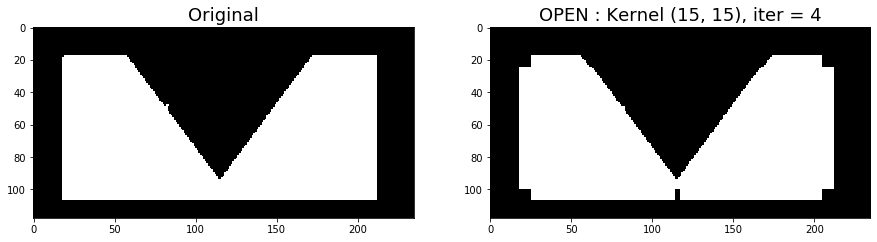

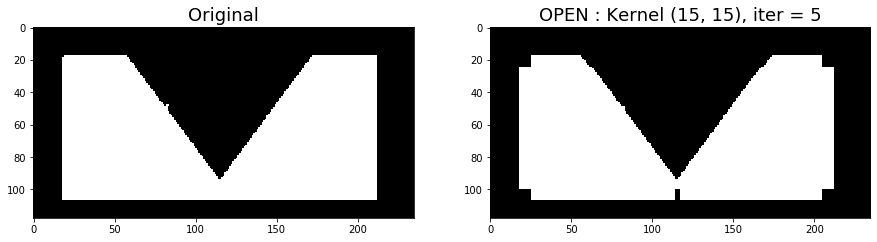

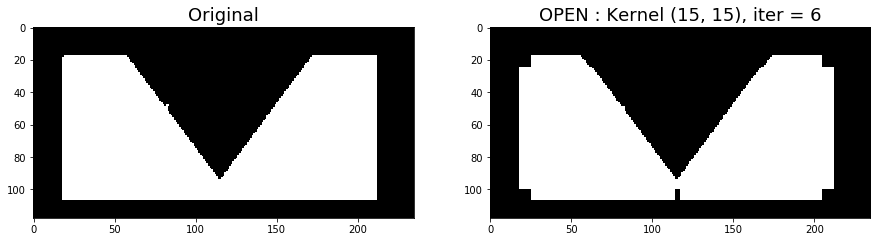

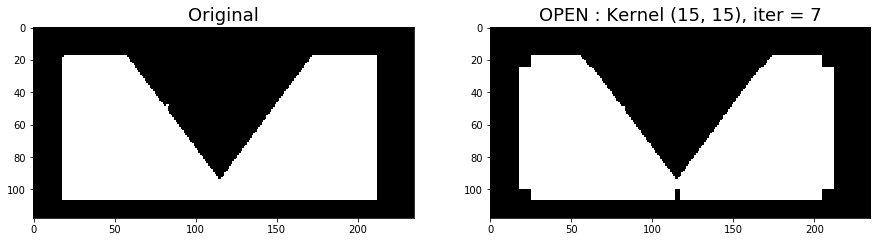

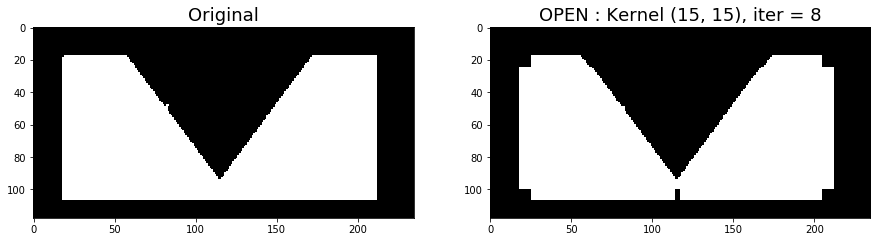

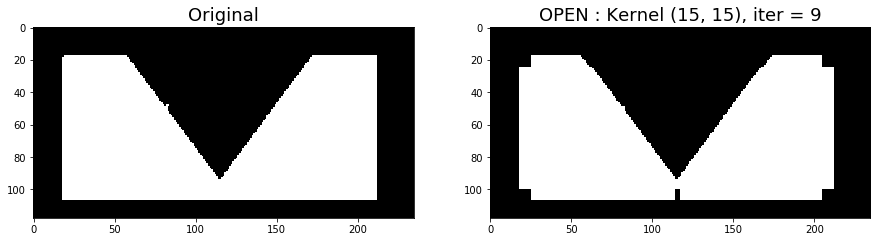

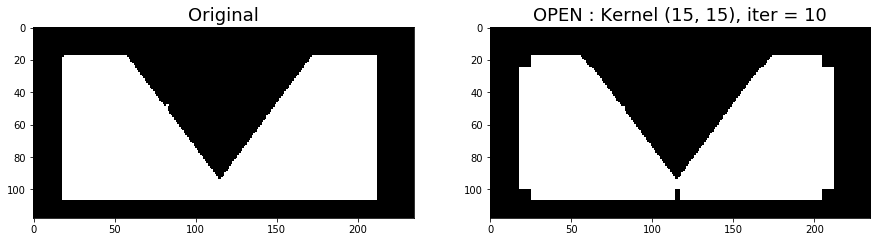

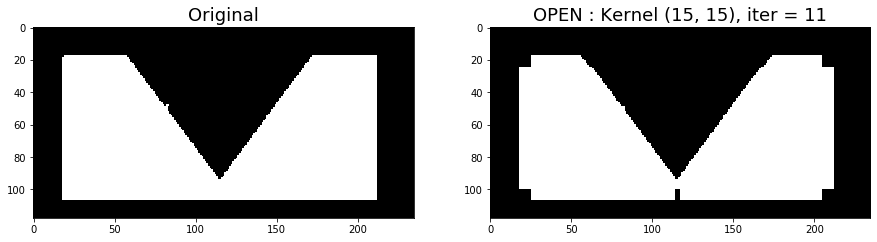

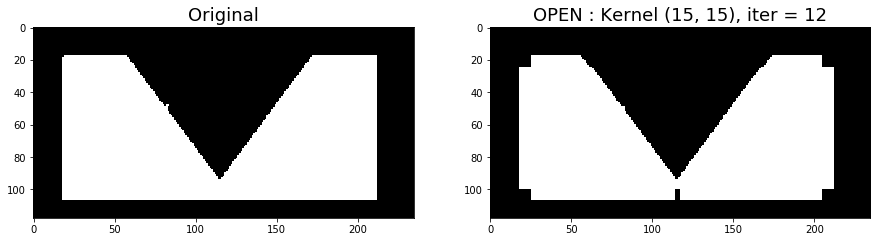

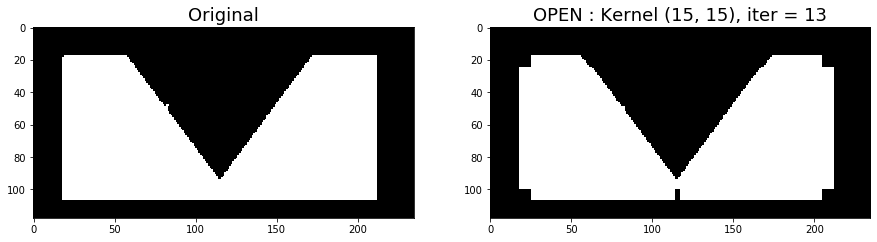

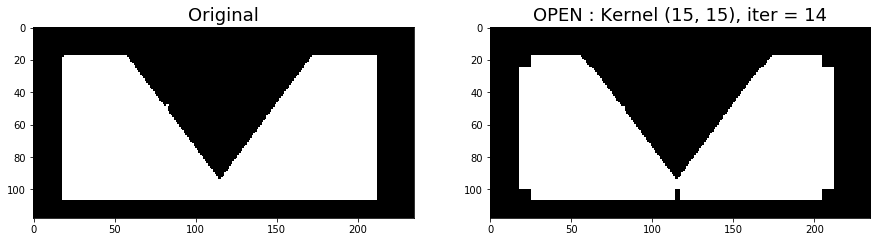

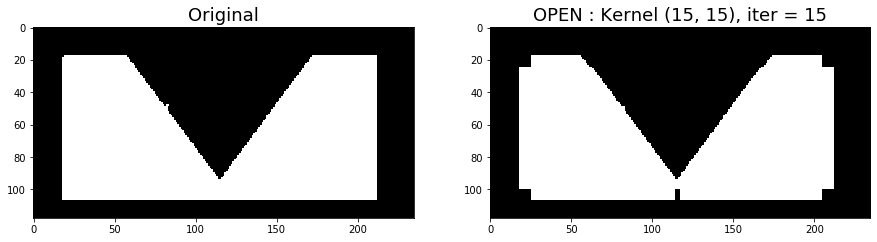

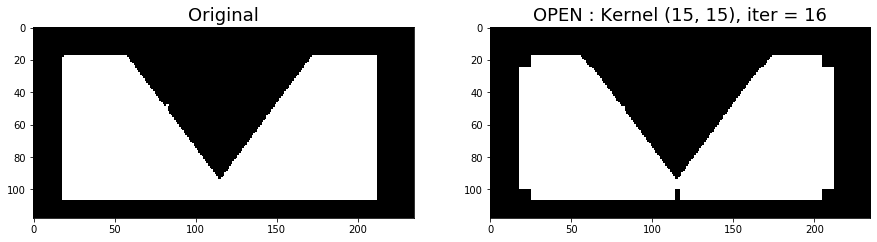

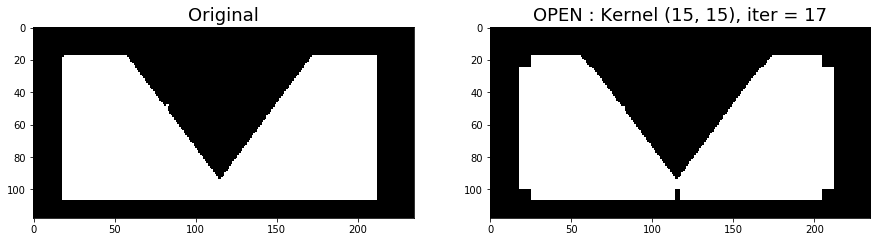

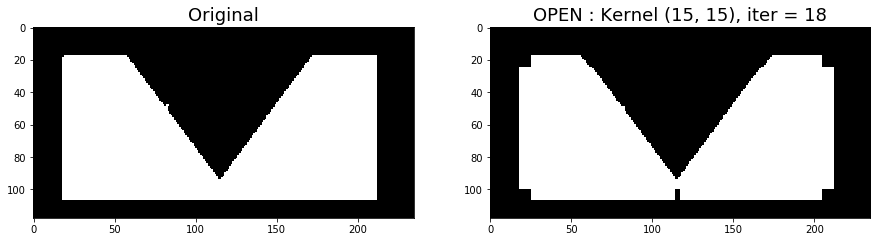

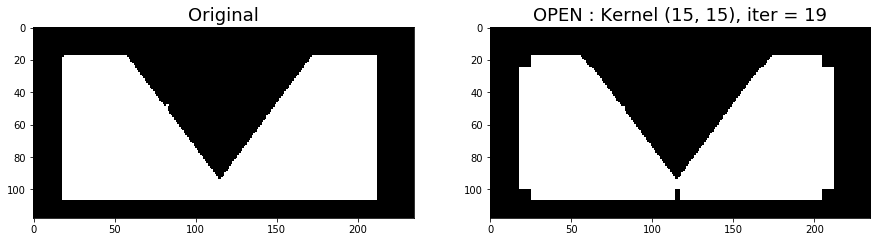

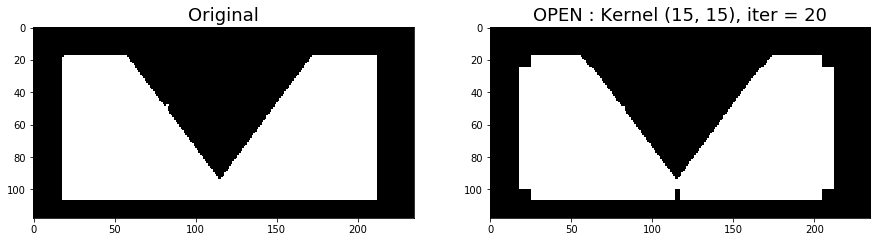

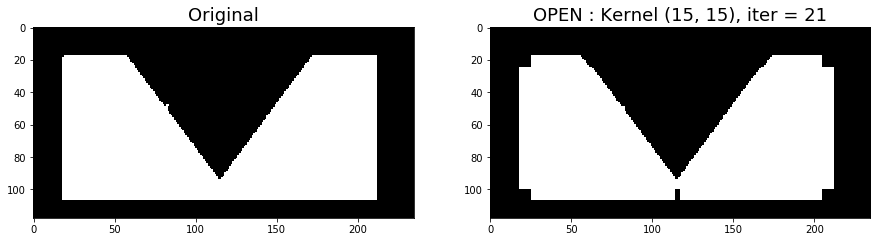

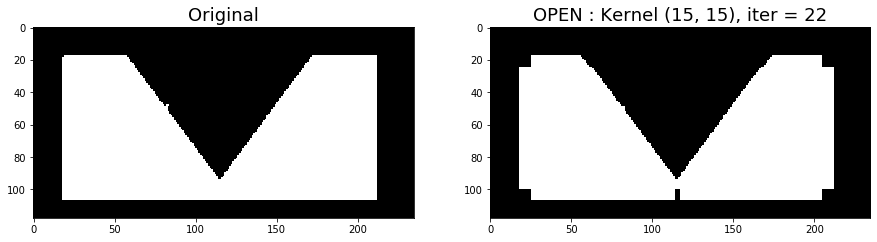

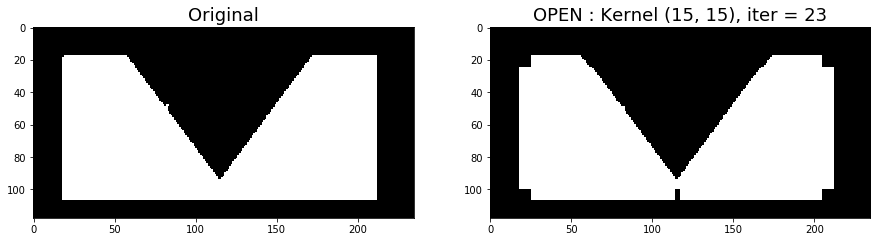

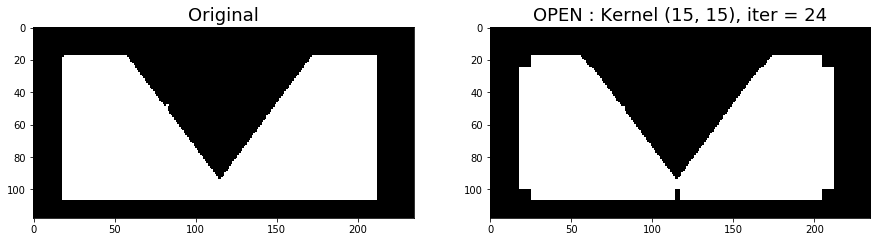

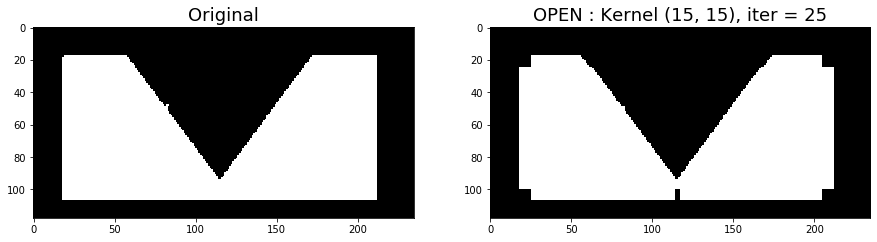

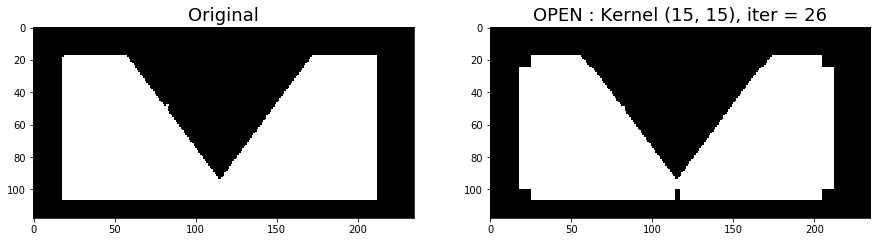

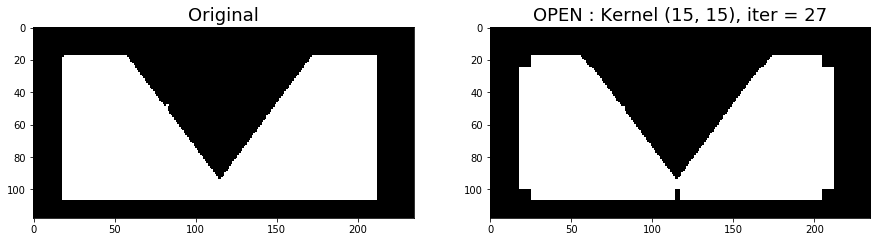

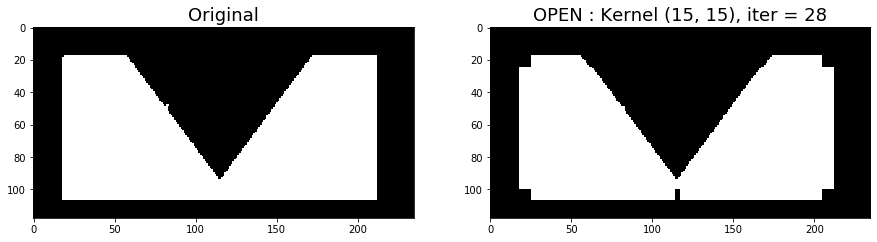

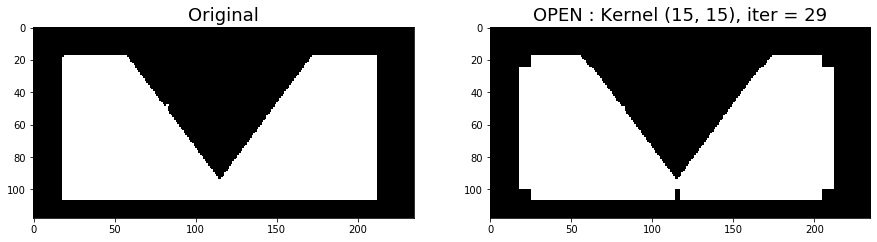

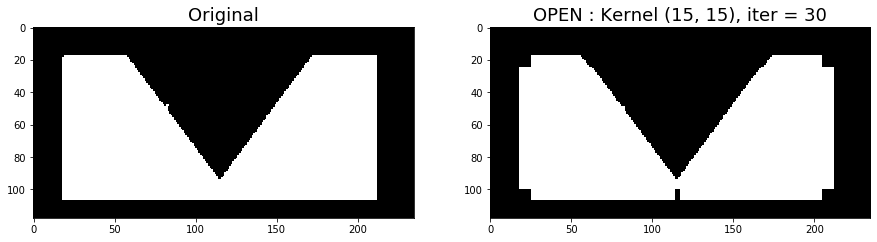

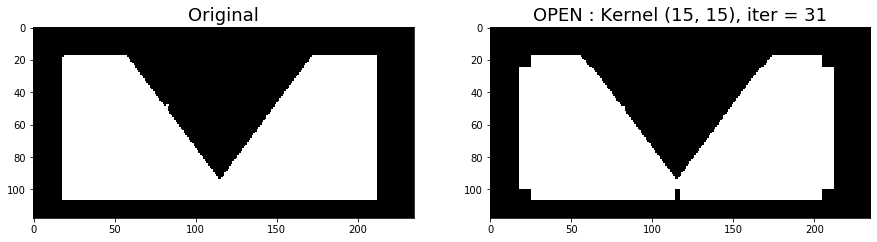

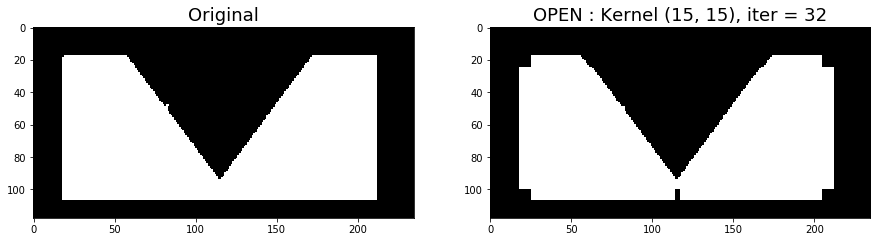

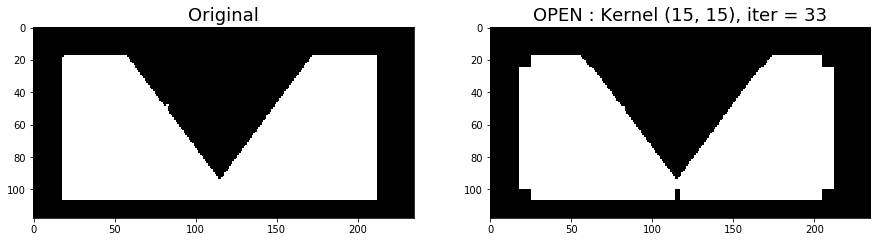

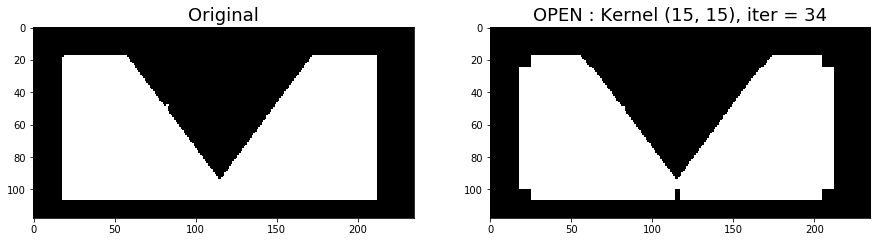

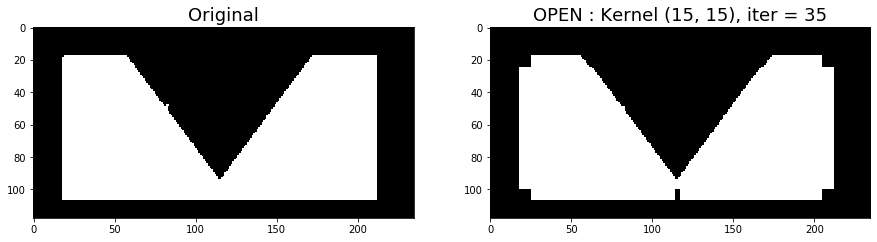

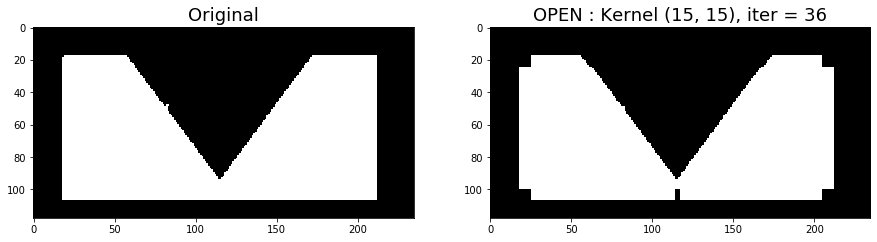

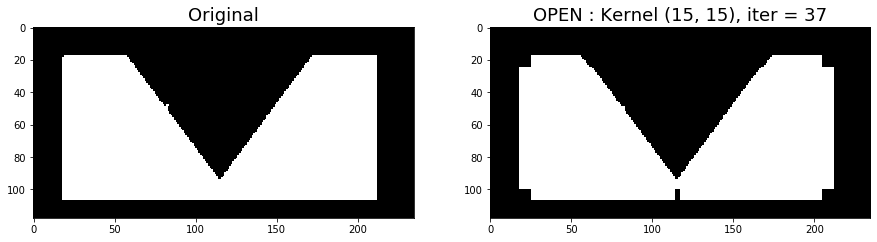

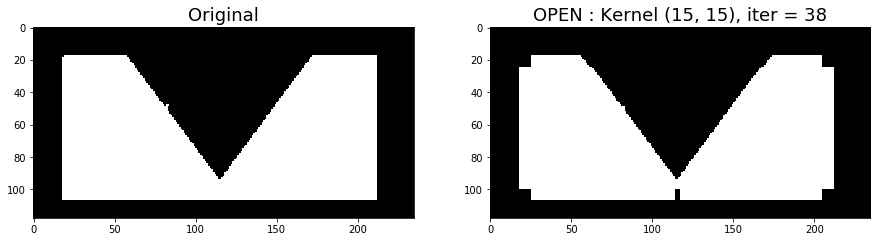

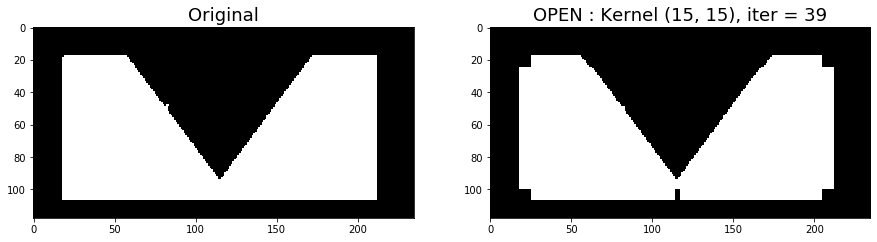

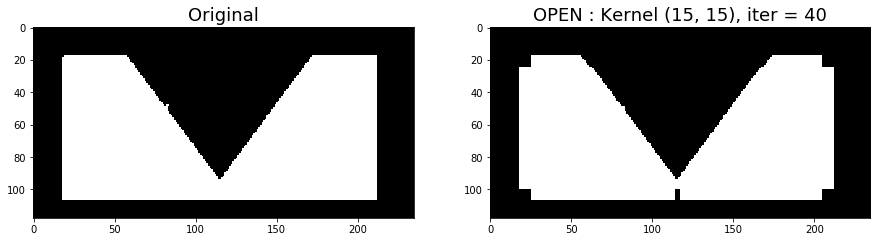

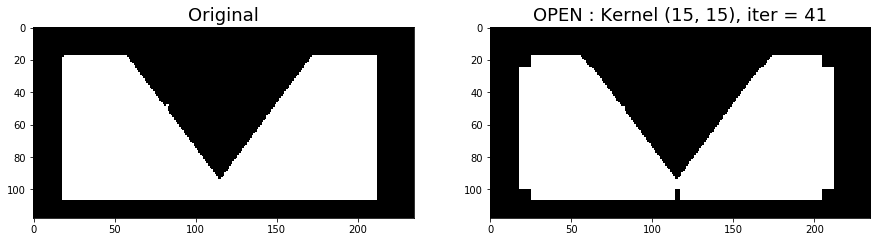

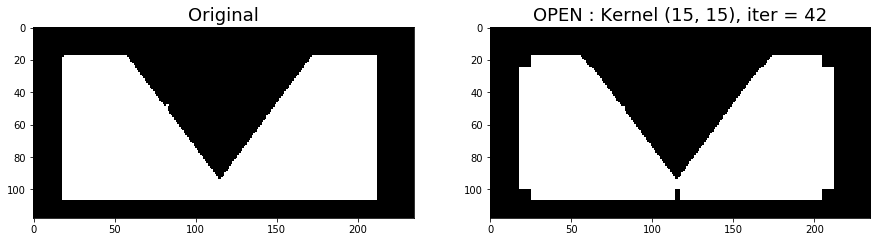

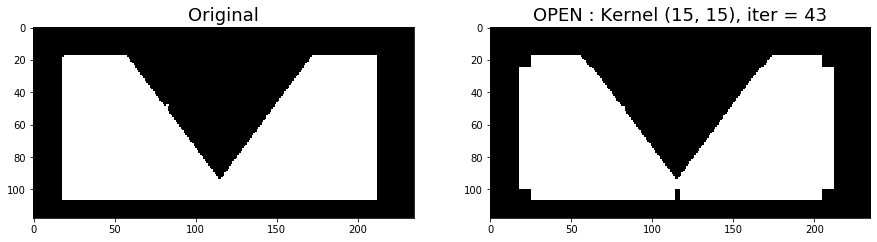

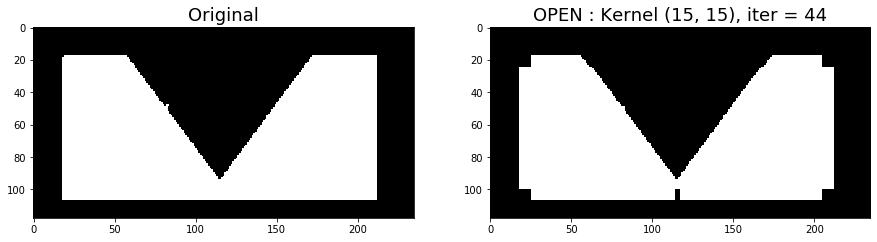

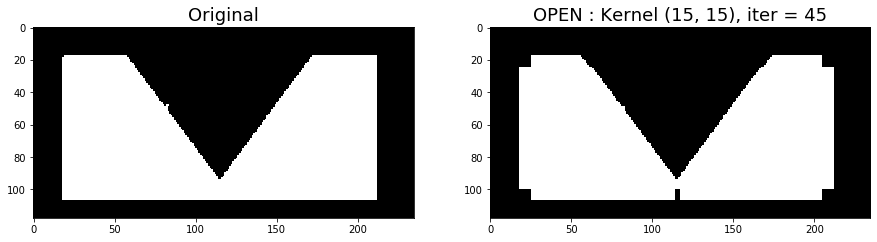

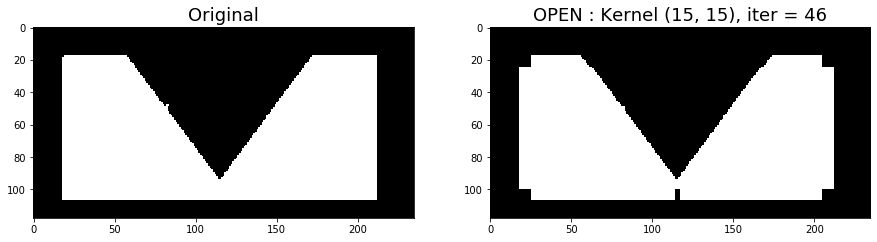

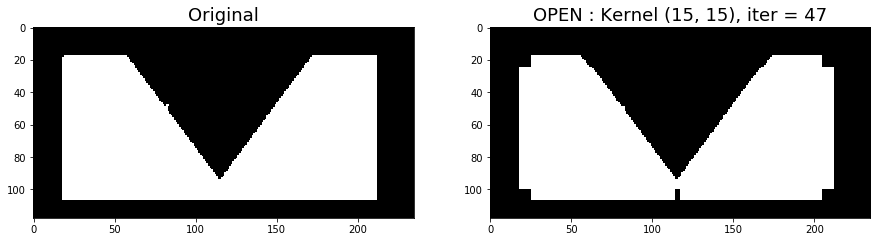

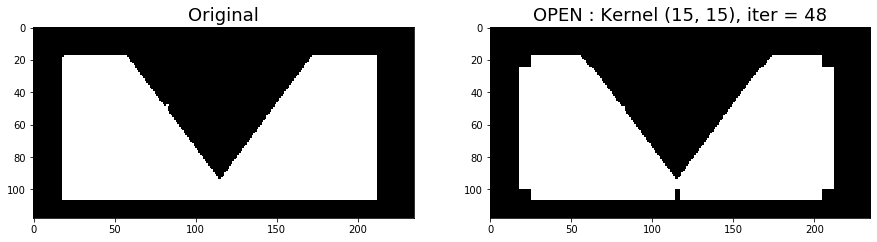

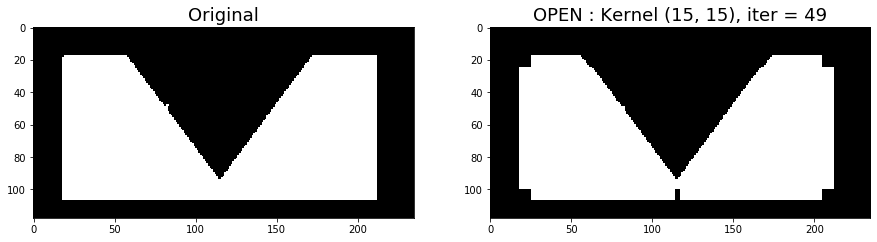

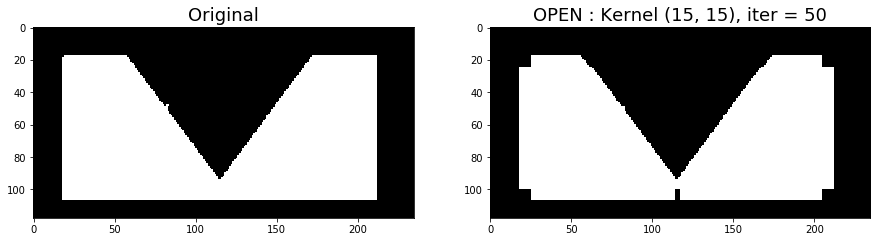

In [110]:
idemPot = figura2.copy()
for i in range(50):
    idemPot = cv.morphologyEx(idemPot, cv.MORPH_OPEN, kernel)
    side_by_side(figura2, idemPot, title1='Original', title2=f'OPEN : Kernel {kernel.shape}, iter = {i+1}')

In [32]:
plt.close('all')

In [156]:
#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (12, 12))
kernel = structuring_circle(radius=12)
#kernel

In [157]:
#side_by_side(figura2, opening(figura2, kernel), title1='Original', title2=f'OPEN : Kernel {kernel.shape}, iter = {i+1}')

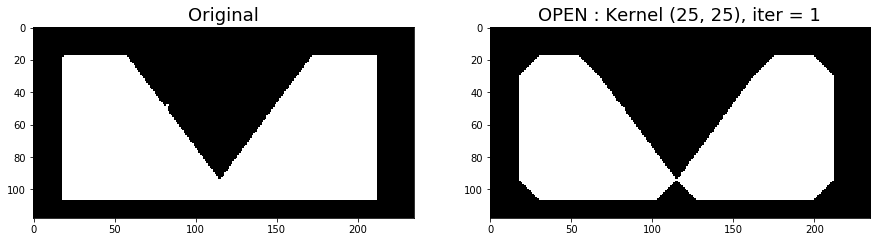

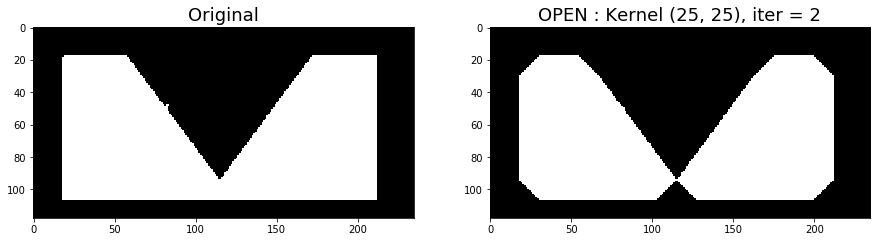

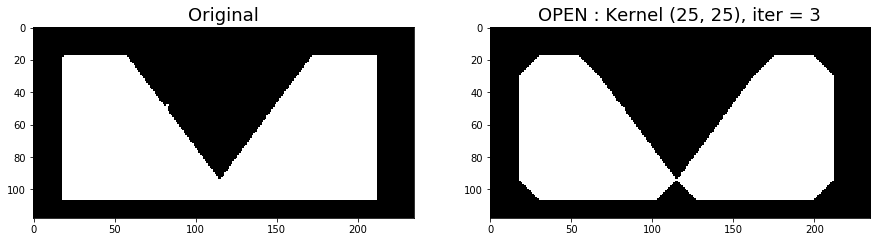

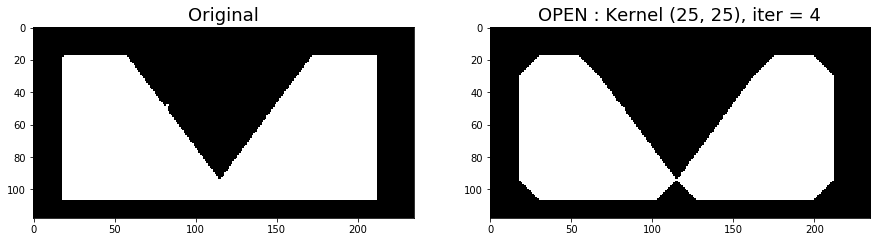

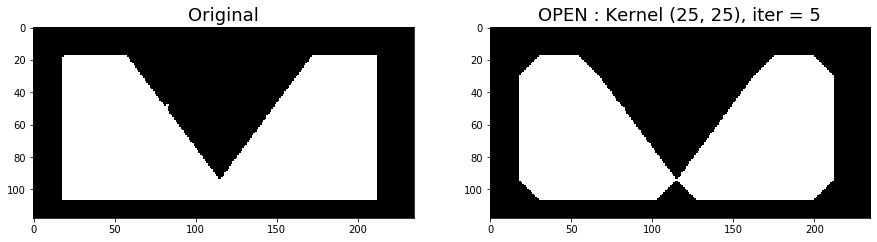

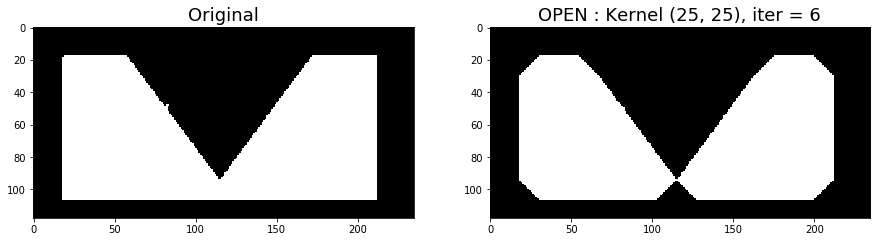

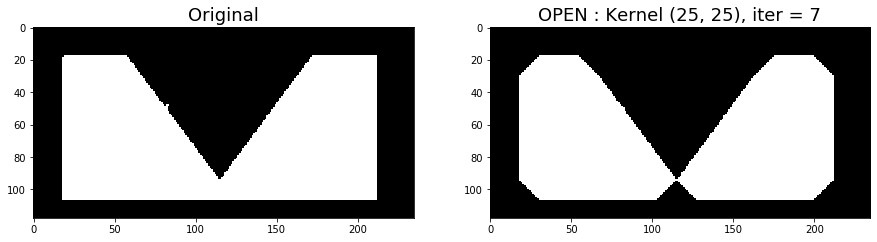

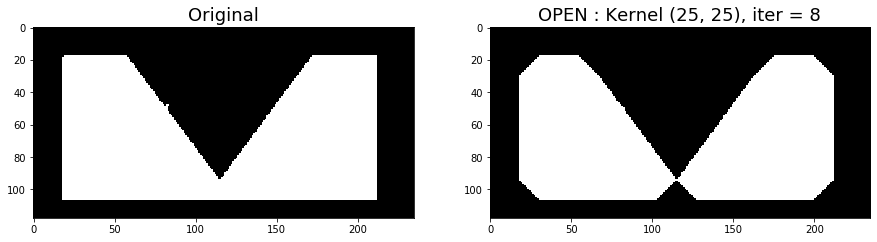

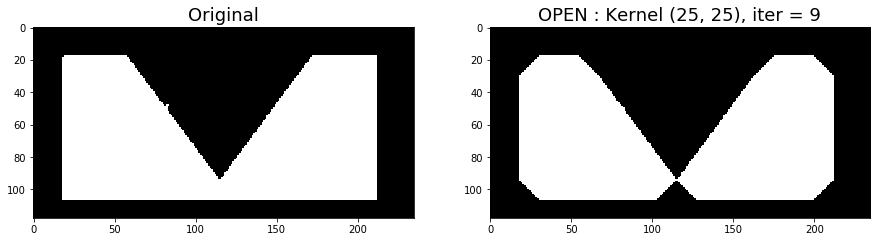

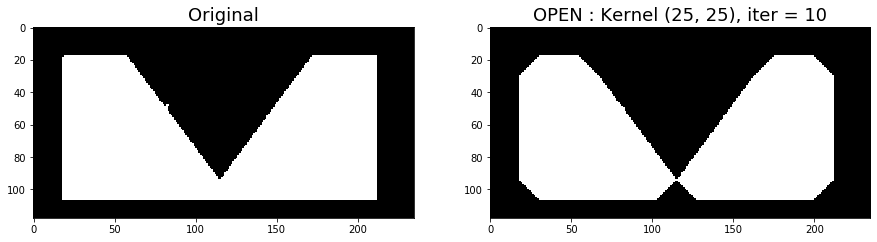

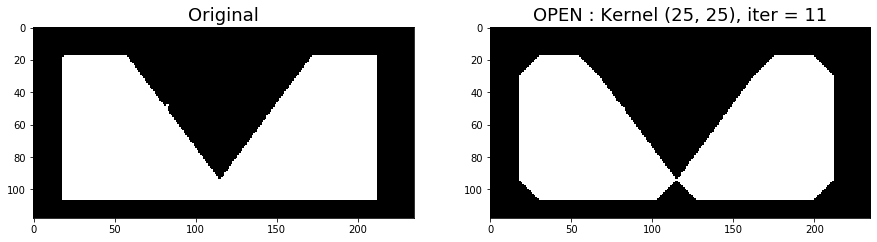

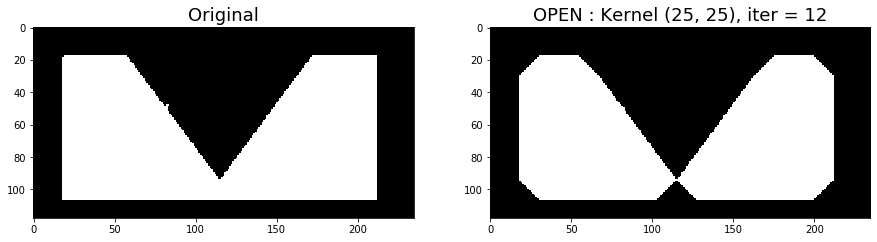

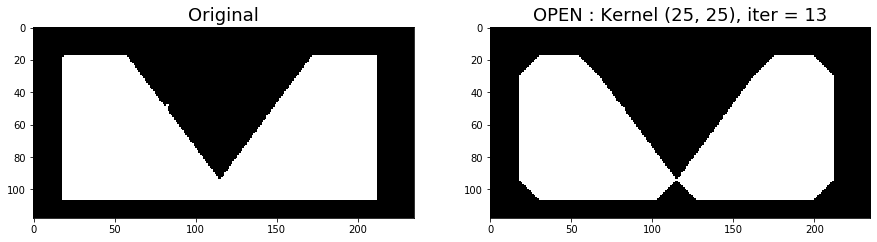

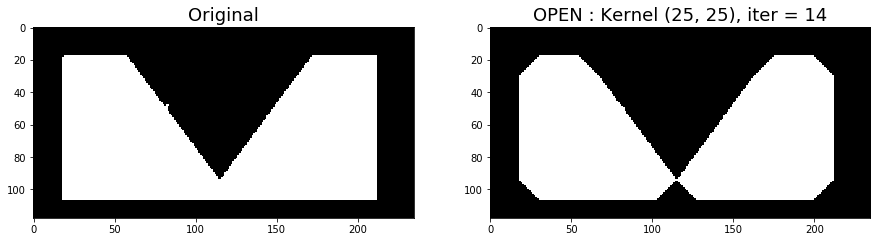

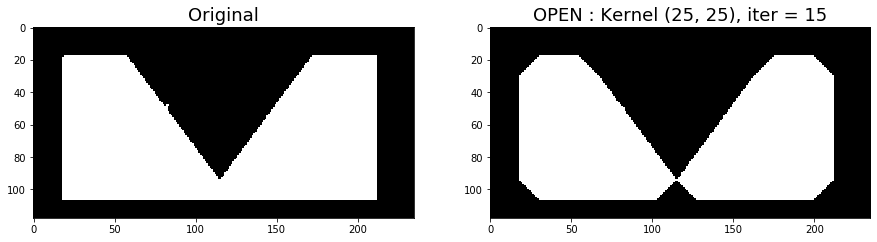

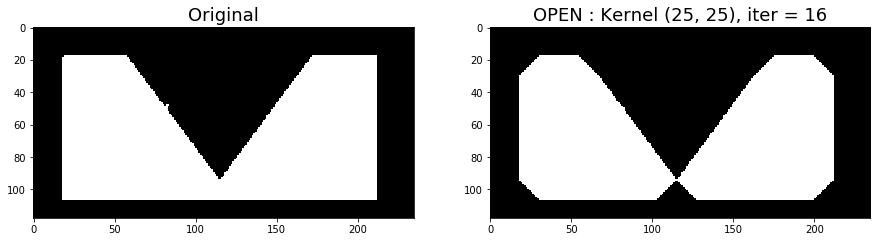

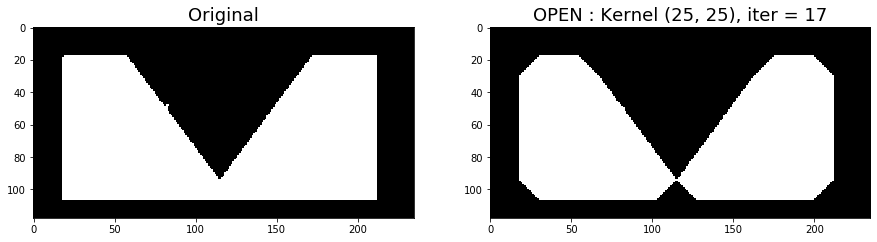

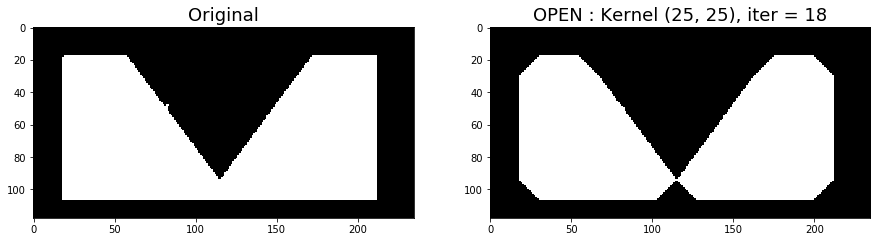

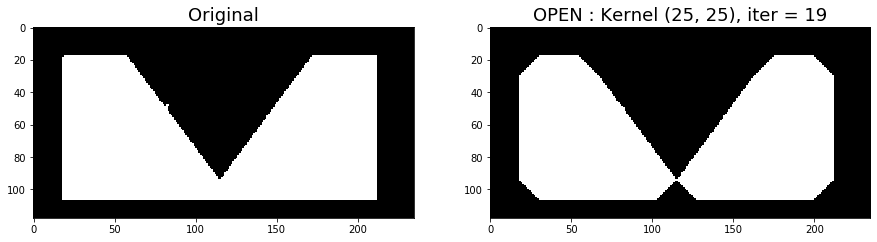

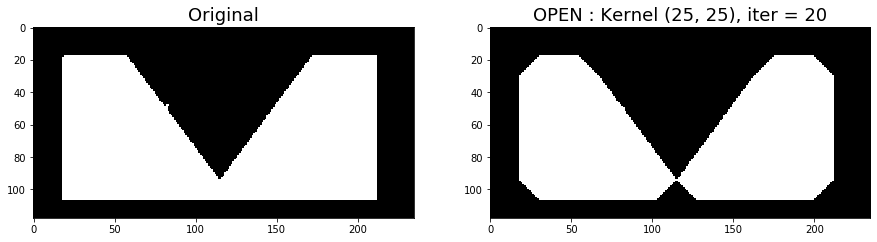

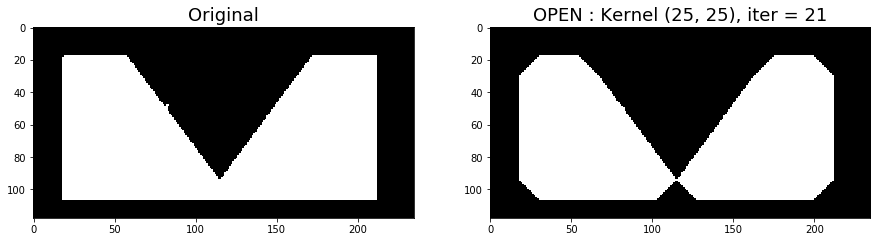

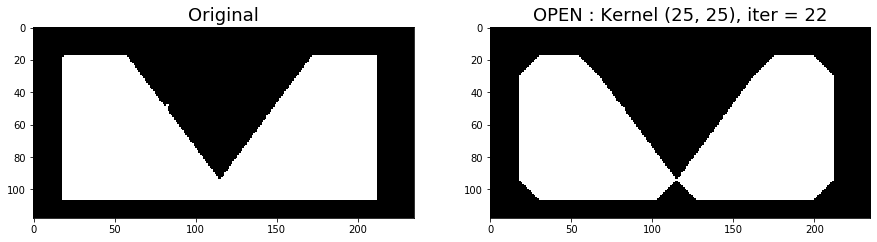

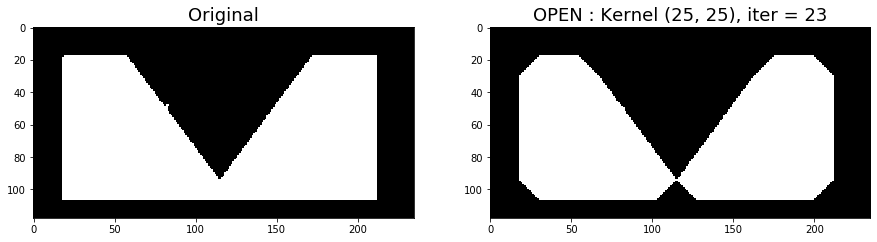

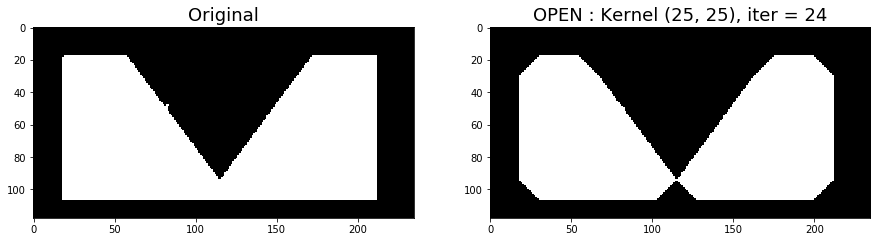

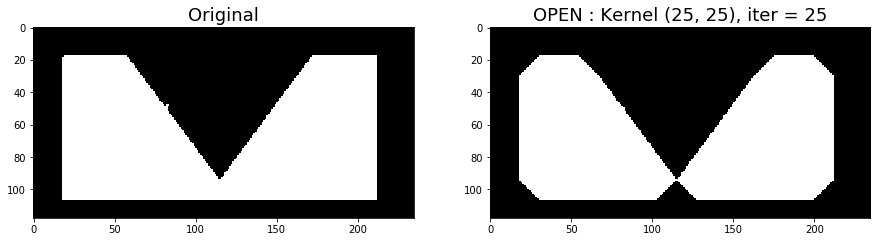

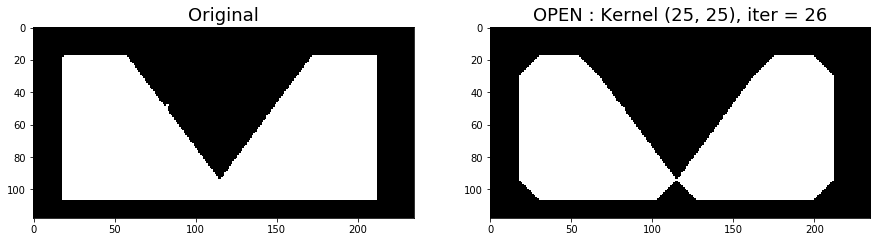

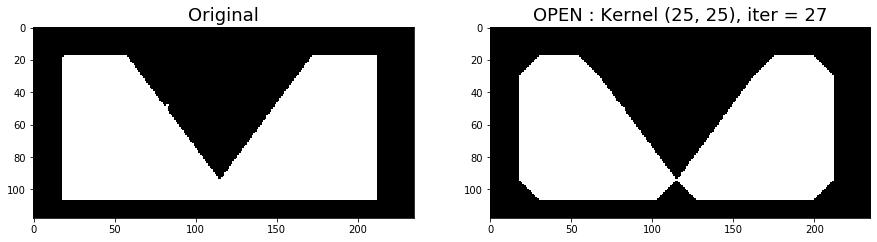

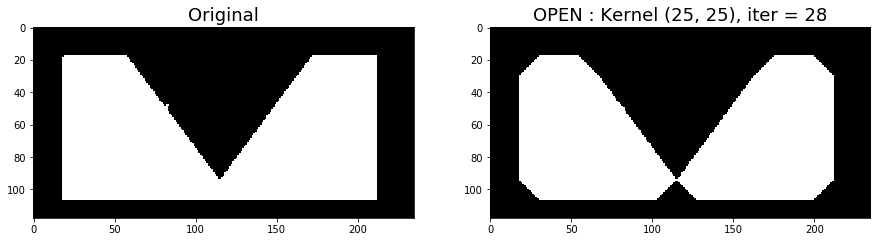

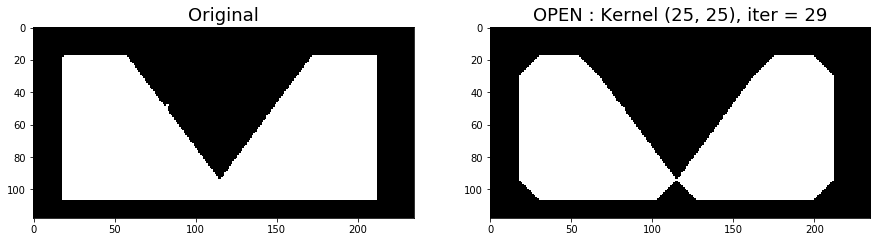

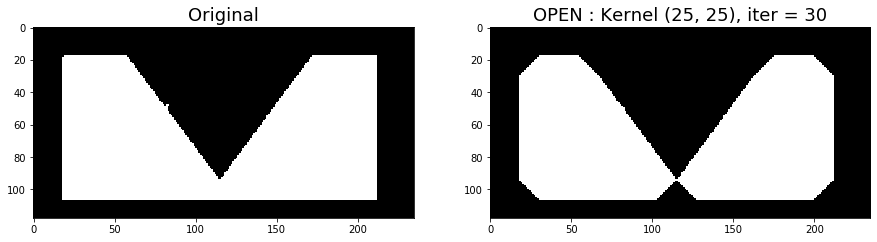

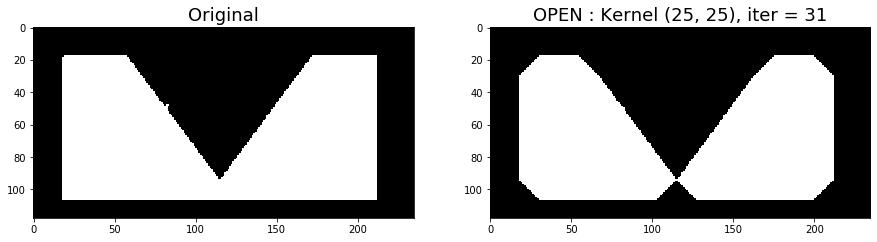

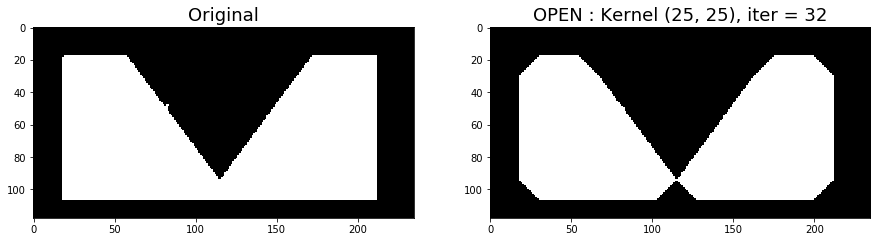

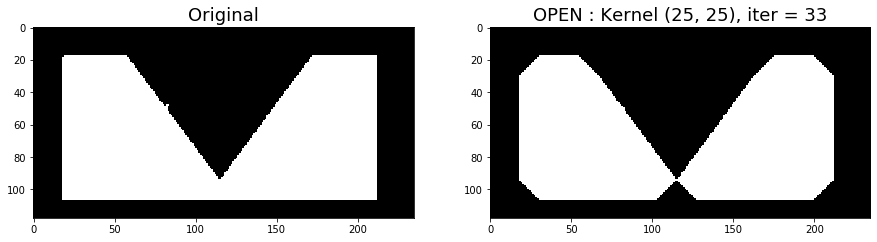

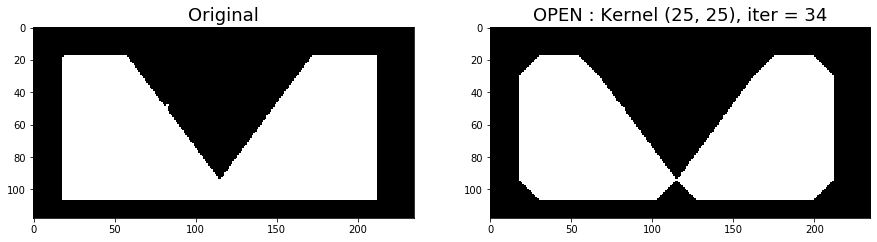

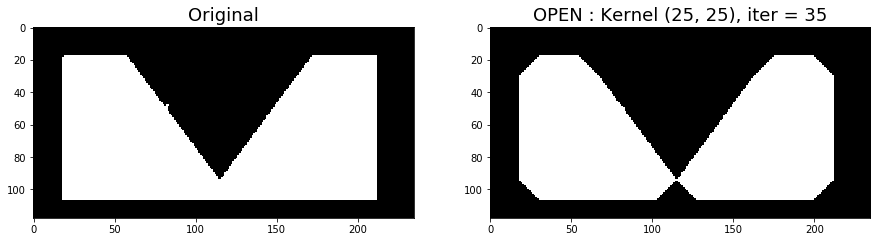

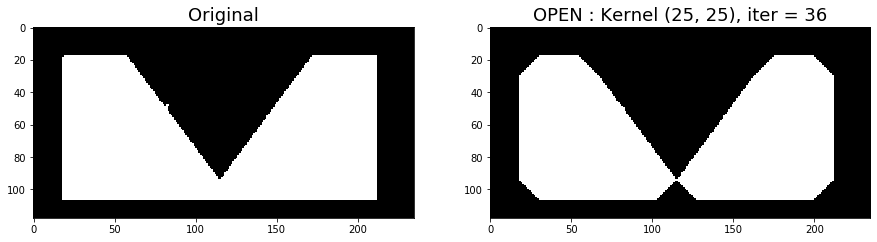

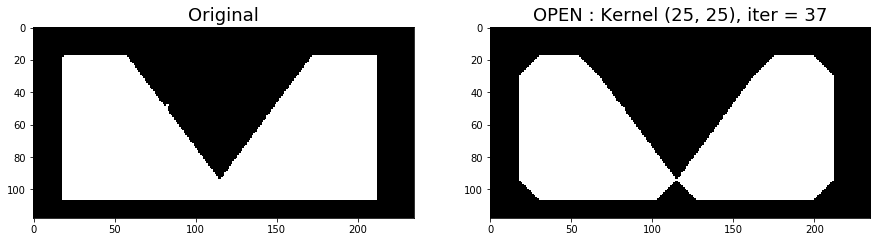

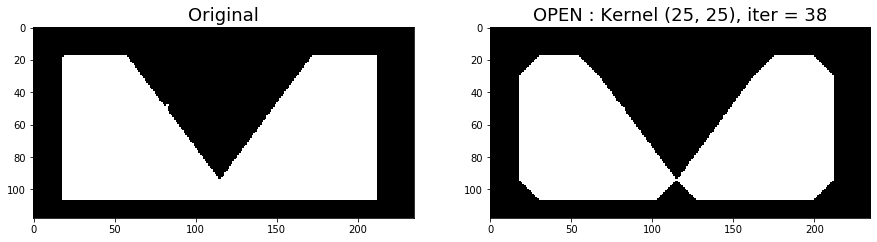

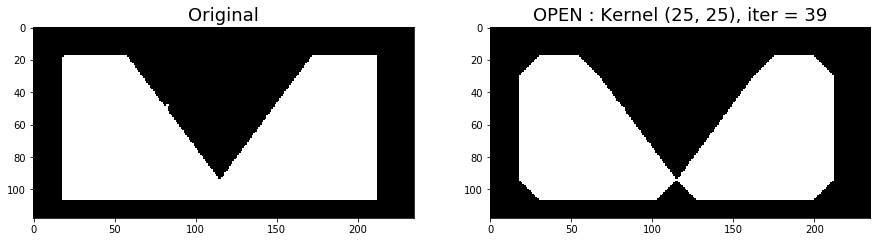

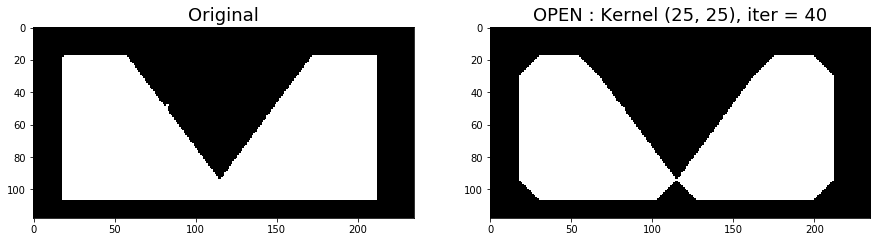

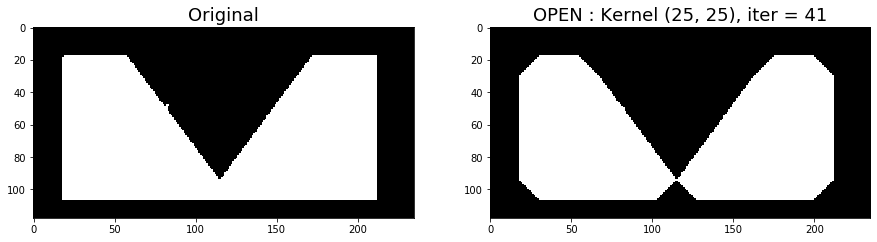

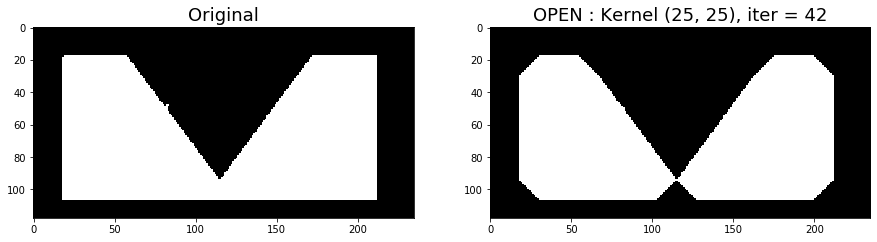

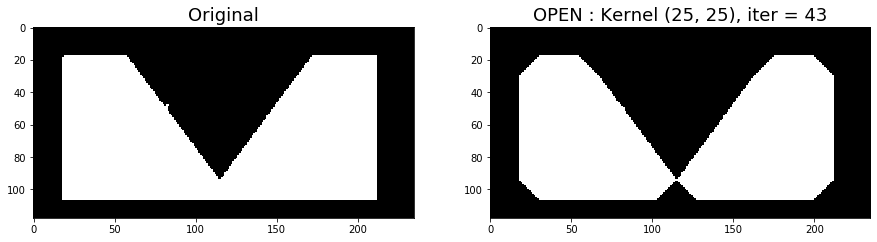

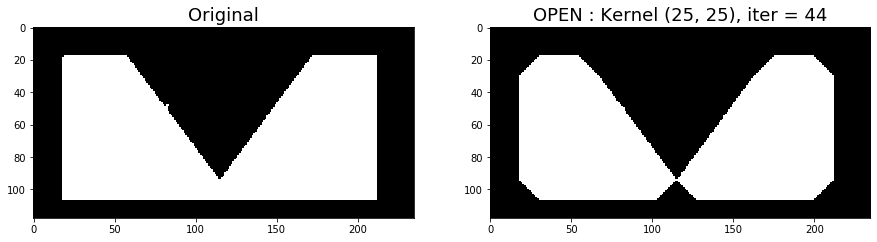

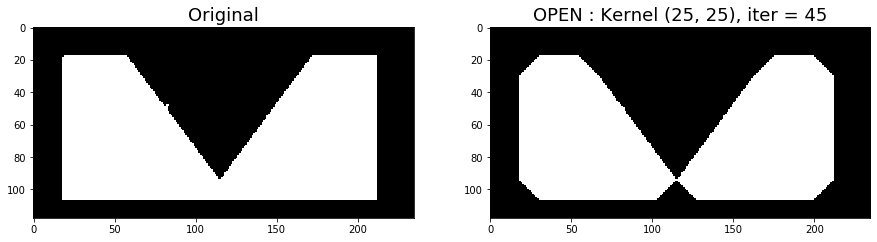

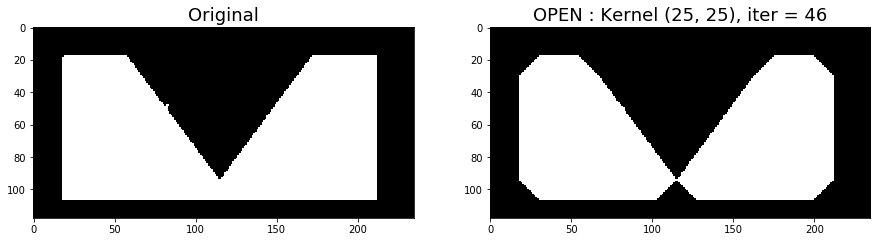

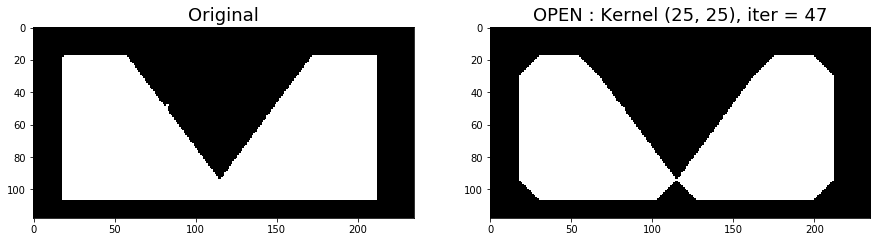

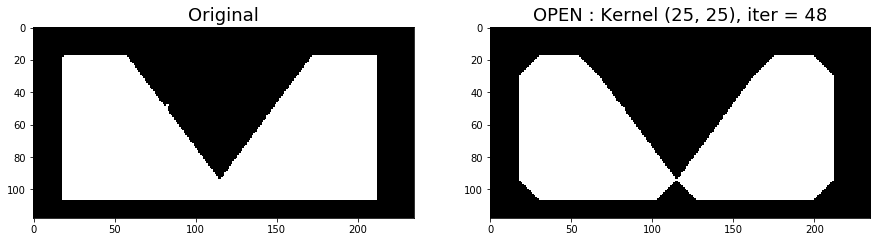

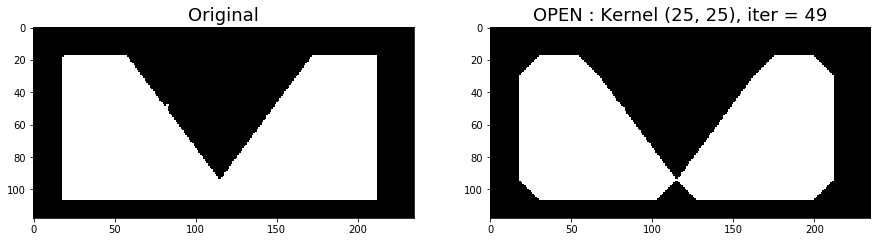

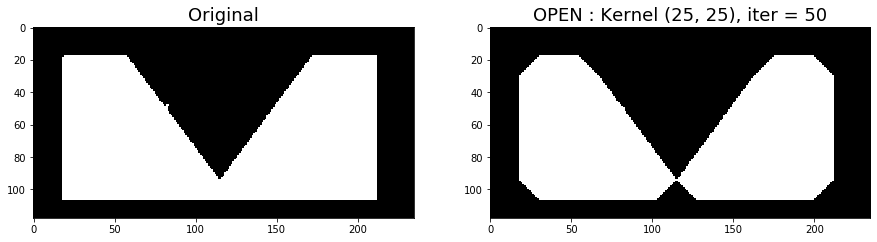

In [158]:
idemPot = figura2.copy()
for i in range(50):
    idemPot = cv.morphologyEx(idemPot, cv.MORPH_OPEN, kernel)
    side_by_side(figura2, idemPot, title1='Original', title2=f'OPEN : Kernel {kernel.shape}, iter = {i+1}')

In [149]:
plt.close('all')

It seems that OpenCV's implementation of the ellyptical/circular structuring element is kind of poor, i.e. its lack of precision breaks the idempotence property of Opening. 
Creating a better structuring element (i.e. having it to be symmetrical at least) will result in idempotence being respected.

That's why I created ```structuring_circle()``` found in ```.utils.py``` which gives a decent circle mask.

In [7]:
fing = cv.imread('imagenes/fingerprint.png', 0) / 255
fing.shape, fing.dtype

((464, 615), dtype('float64'))

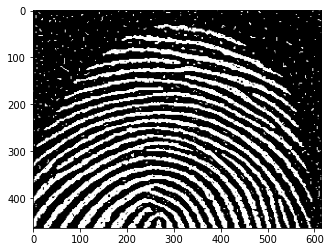

In [9]:
plt.imshow(fing, cmap='gray')

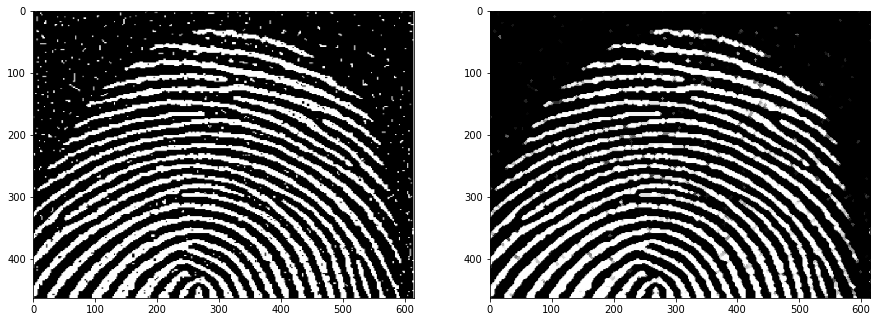

In [13]:
kernel = structuring_circle(radius=2)
side_by_side(fing, closing(opening(fing, kernel), kernel))